<a href="https://colab.research.google.com/github/DATA601-CustSegment-Nov2025-to-Feb2026/New-CustSegment-Project/blob/Andy_test/01_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_filepath = '/content/drive/MyDrive/Customer-Segmentation-files/data/customer_segmentation_after_merging.csv'

In [ ]:
# Display first 5 rows of the dataset
df = pd.read_csv(df_filepath)
df.head()

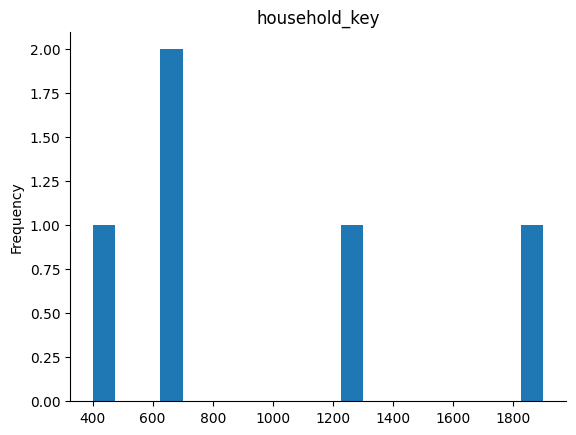

In [ ]:
from matplotlib import pyplot as plt
_df_0['household_key'].plot(kind='hist', bins=20, title='household_key')
plt.gca().spines[['top', 'right',]].set_visible(False)

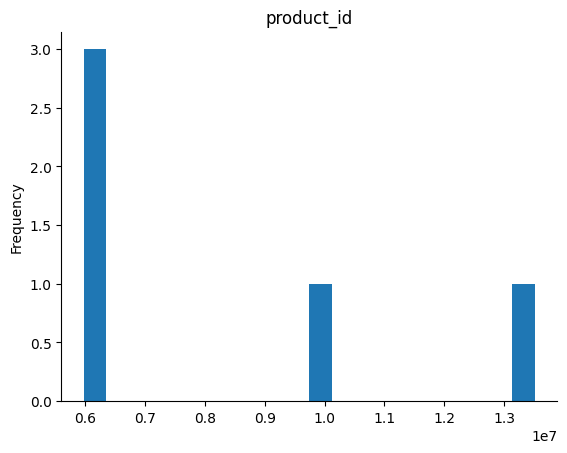

In [ ]:
from matplotlib import pyplot as plt
_df_3['product_id'].plot(kind='hist', bins=20, title='product_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 27 columns):
 #   Column                Dtype  
---  ------                -----  
 0   household_key         int64  
 1   basket_id             int64  
 2   day                   int64  
 3   product_id            int64  
 4   quantity              int64  
 5   sales_value           float64
 6   store_id              int64  
 7   retail_disc           float64
 8   trans_time            int64  
 9   week_no               int64  
 10  coupon_disc           float64
 11  coupon_match_disc     float64
 12  age_desc              object 
 13  marital_status_code   object 
 14  income_desc           object 
 15  homeowner_desc        object 
 16  hh_comp_desc          object 
 17  household_size_desc   object 
 18  kid_category_desc     object 
 19  manufacturer          int64  
 20  department            object 
 21  brand                 object 
 22  commodity_desc        object 
 23  sub_com

In [ ]:
df.isnull().sum()

household_key           0
basket_id               0
day                     0
product_id              0
quantity                0
sales_value             0
store_id                0
retail_disc             0
trans_time              0
week_no                 0
coupon_disc             0
coupon_match_disc       0
age_desc                0
marital_status_code     0
income_desc             0
homeowner_desc          0
hh_comp_desc            0
household_size_desc     0
kid_category_desc       0
manufacturer            0
department              0
brand                   0
commodity_desc          0
sub_commodity_desc      0
curr_size_of_product    0
display                 0
mailer                  0
dtype: int64

In [ ]:
# Define the list of columns where missing values will be filled with 'Unknown'
columns_to_fill_with_unknown = [
    'age_desc', 'marital_status_code', 'income_desc', 'homeowner_desc',
    'hh_comp_desc', 'household_size_desc', 'kid_category_desc', 'display', 'mailer'
]

# Fill missing values in the specified columns with 'Unknown'
df[columns_to_fill_with_unknown] = df[columns_to_fill_with_unknown].fillna('Unknown')

# Print a confirmation message
print(f"Filled missing values in {columns_to_fill_with_unknown} with 'Unknown'.")

Filled missing values in ['age_desc', 'marital_status_code', 'income_desc', 'homeowner_desc', 'hh_comp_desc', 'household_size_desc', 'kid_category_desc', 'display', 'mailer'] with 'Unknown'.


In [ ]:
columns_to_drop = ['coupon_upc', 'campaign', 'description', 'start_day', 'end_day']
df = df.drop(columns=columns_to_drop)
print(f"Dropped columns: {columns_to_drop}")
print(f"New DataFrame shape: {df.shape}")

Dropped columns: ['coupon_upc', 'campaign', 'description', 'start_day', 'end_day']
New DataFrame shape: (2595732, 27)


In [ ]:
df.isnull().sum()

household_key           0
basket_id               0
day                     0
product_id              0
quantity                0
sales_value             0
store_id                0
retail_disc             0
trans_time              0
week_no                 0
coupon_disc             0
coupon_match_disc       0
age_desc                0
marital_status_code     0
income_desc             0
homeowner_desc          0
hh_comp_desc            0
household_size_desc     0
kid_category_desc       0
manufacturer            0
department              0
brand                   0
commodity_desc          0
sub_commodity_desc      0
curr_size_of_product    0
display                 0
mailer                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 27 columns):
 #   Column                Dtype  
---  ------                -----  
 0   household_key         int64  
 1   basket_id             int64  
 2   day                   int64  
 3   product_id            int64  
 4   quantity              int64  
 5   sales_value           float64
 6   store_id              int64  
 7   retail_disc           float64
 8   trans_time            int64  
 9   week_no               int64  
 10  coupon_disc           float64
 11  coupon_match_disc     float64
 12  age_desc              object 
 13  marital_status_code   object 
 14  income_desc           object 
 15  homeowner_desc        object 
 16  hh_comp_desc          object 
 17  household_size_desc   object 
 18  kid_category_desc     object 
 19  manufacturer          int64  
 20  department            object 
 21  brand                 object 
 22  commodity_desc        object 
 23  sub_com

In [ ]:
#check for duplicates rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows before dropping: {num_duplicates}")

Number of duplicate rows before dropping: 0


In [ ]:
df.drop_duplicates(inplace=True)
print(f"Number of rows after dropping duplicates: {df.shape[0]}")
print(f"New DataFrame shape: {df.shape}")

Number of rows after dropping duplicates: 2595732
New DataFrame shape: (2595732, 27)


# Task
Calculate the following purchase behavior features for each household: total spending, average basket value, number of visits/baskets, quantity purchased per basket, discount-dependence, share of each department, and time-of-day preference. Consolidate these features into a single DataFrame.

## Derive All Purchase Behavior Features

### Subtask:
Calculate and consolidate various purchase behavior features for each household into a single DataFrame. The features include total spending, average basket value, number of visits/baskets, quantity purchased per basket, discount-dependence, share of each department, and time-of-day preference.


**Reasoning**:
The first step is to calculate the 'total_spending' and 'num_visits' for each household. 'total_spending' is the sum of 'sales_value' per household, and 'num_visits' is the count of unique 'basket_id's per household. These will form the base for other calculations.



In [ ]:
total_spending = df.groupby('household_key')['sales_value'].sum().rename('total_spending')
num_visits = df.groupby('household_key')['basket_id'].nunique().rename('num_visits')

# Consolidate into a single DataFrame
household_features = pd.DataFrame(total_spending).merge(num_visits, on='household_key')

print("Calculated total spending and number of visits per household.")
print(household_features.head())

Calculated total spending and number of visits per household.
               total_spending  num_visits
household_key                            
1                     4330.16          86
2                     1954.34          45
3                     2653.21          47
4                     1200.11          30
5                      779.06          40


# Task
Calculate the average basket value for each household. First, sum 'sales_value' for each unique 'basket_id' to get individual basket totals. Then, for each 'household_key', compute the average of these basket totals. Finally, consolidate this new feature with the previously calculated household features.

## Calculate Average Basket Value

### Subtask:
Calculate the average basket value for each household and consolidate it into the `household_features` DataFrame.


**Reasoning**:
To calculate the average basket value, first I need to determine the total sales value for each basket by grouping the DataFrame `df` by 'basket_id' and summing the 'sales_value'.



In [ ]:
basket_totals = df.groupby('basket_id')['sales_value'].sum().rename('basket_sales_value')

print("Calculated total sales value for each basket.")
print(basket_totals.head())

Calculated total sales value for each basket.
basket_id
26984851472     5.91
26984851516    12.43
26984896261    11.37
26984905972     2.55
26984945254     3.53
Name: basket_sales_value, dtype: float64


**Reasoning**:
Now that the total sales value for each basket (`basket_totals`) has been calculated, I need to merge this information back with the original DataFrame `df` to associate each basket's total sales with its corresponding `household_key`. This is a preparatory step for calculating the average basket value per household.



In [ ]:
df_with_basket_totals = df.merge(basket_totals, on='basket_id', how='left')

print("Merged basket totals with the main DataFrame.")
print(df_with_basket_totals.head())

Merged basket totals with the main DataFrame.
   household_key    basket_id  day  product_id  quantity  sales_value  \
0           1228  31553560338  308    10118257         8        57.52   
1            679  32957147025  403     5978656         0         0.00   
2            679  32957147063  403     5978656         0         0.00   
3           1901  33919382569  465    13511457        24        60.00   
4            400  41124522239  627     5978656         0         0.00   

   store_id  retail_disc  trans_time  week_no  ...  kid_category_desc  \
0       327        -6.40        1113       45  ...       None/Unknown   
1       447         0.00        1826       58  ...            Unknown   
2       447         0.00        1837       58  ...            Unknown   
3       319       -52.56        1613       67  ...                  1   
4       388         0.00        1508       90  ...                  1   

   manufacturer  department     brand commodity_desc  \
0            69  MEA

**Reasoning**:
With `df_with_basket_totals` now containing the sales value for each basket and its corresponding household key, the next step is to calculate the average of these basket values for each household. This will give us the 'avg_basket_value' per household.



In [ ]:
avg_basket_value = df_with_basket_totals.groupby('household_key')['basket_sales_value'].mean().rename('avg_basket_value')

print("Calculated average basket value for each household.")
print(avg_basket_value.head())

Calculated average basket value for each household.
household_key
1     76.972930
2     77.412899
3    111.855043
4     67.537508
5     30.086306
Name: avg_basket_value, dtype: float64


**Reasoning**:
Now that 'avg_basket_value' has been calculated for each household, I need to merge this Series into the `household_features` DataFrame to consolidate all household-level features as per the subtask instructions.



In [ ]:
household_features = household_features.merge(avg_basket_value, on='household_key', how='left')

print("Consolidated average basket value into household_features.")
print(household_features.head())

Consolidated average basket value into household_features.
               total_spending  num_visits  avg_basket_value
household_key                                              
1                     4330.16          86         76.972930
2                     1954.34          45         77.412899
3                     2653.21          47        111.855043
4                     1200.11          30         67.537508
5                      779.06          40         30.086306


## Calculate Quantity Purchased per Basket

### Subtask:
Calculate the average quantity purchased per basket for each household and consolidate it into the `household_features` DataFrame.


### Calculate Quantity Purchased per Basket

#### Subtask:
Calculate the average quantity purchased per basket for each household and consolidate it into the `household_features` DataFrame.

**Reasoning**:
To calculate the average quantity purchased per basket for each household, the first step is to determine the total quantity purchased for each individual basket by grouping the DataFrame `df` by 'basket_id' and summing the 'quantity'.

**Reasoning**:
Following the instructions, I will now calculate the total quantity purchased for each unique 'basket_id' by grouping the DataFrame `df` and summing the 'quantity' column. This will be stored as `basket_quantities`.



In [ ]:
basket_quantities = df.groupby('basket_id')['quantity'].sum().rename('basket_total_quantity')

print("Calculated total quantity for each basket.")
print(basket_quantities.head())

Calculated total quantity for each basket.
basket_id
26984851472    5
26984851516    7
26984896261    5
26984905972    9
26984945254    4
Name: basket_total_quantity, dtype: int64


**Reasoning**:
Now that the total quantity purchased for each basket (`basket_quantities`) has been calculated, I need to merge this information back with the original DataFrame `df` to associate each transaction with its basket's total quantity. This is a preparatory step for calculating the average quantity purchased per basket per household.



In [ ]:
df_with_basket_quantities = df.merge(basket_quantities, on='basket_id', how='left')

print("Merged basket quantities with the main DataFrame.")
print(df_with_basket_quantities.head())

Merged basket quantities with the main DataFrame.
   household_key    basket_id  day  product_id  quantity  sales_value  \
0           1228  31553560338  308    10118257         8        57.52   
1            679  32957147025  403     5978656         0         0.00   
2            679  32957147063  403     5978656         0         0.00   
3           1901  33919382569  465    13511457        24        60.00   
4            400  41124522239  627     5978656         0         0.00   

   store_id  retail_disc  trans_time  week_no  ...  kid_category_desc  \
0       327        -6.40        1113       45  ...       None/Unknown   
1       447         0.00        1826       58  ...            Unknown   
2       447         0.00        1837       58  ...            Unknown   
3       319       -52.56        1613       67  ...                  1   
4       388         0.00        1508       90  ...                  1   

   manufacturer  department     brand commodity_desc  \
0            69 

**Reasoning**:
Now that `df_with_basket_quantities` contains the total quantity for each basket associated with its household, the next step is to group this DataFrame by 'household_key' and calculate the mean of 'basket_total_quantity' to determine the 'avg_quantity_per_basket' for each household.



In [ ]:
avg_quantity_per_basket = df_with_basket_quantities.groupby('household_key')['basket_total_quantity'].mean().rename('avg_quantity_per_basket')

print("Calculated average quantity purchased per basket for each household.")
print(avg_quantity_per_basket.head())

Calculated average quantity purchased per basket for each household.
household_key
1    36.587724
2    34.602241
3    74.835141
4    22.986711
5    10.274775
Name: avg_quantity_per_basket, dtype: float64


**Reasoning**:
Now that 'avg_quantity_per_basket' has been calculated for each household, I need to merge this Series into the `household_features` DataFrame to consolidate all household-level features as per the subtask instructions.



In [ ]:
household_features = household_features.merge(avg_quantity_per_basket, on='household_key', how='left')

print("Consolidated average quantity per basket into household_features.")
print(household_features.head())

Consolidated average quantity per basket into household_features.
               total_spending  num_visits  avg_basket_value  \
household_key                                                 
1                     4330.16          86         76.972930   
2                     1954.34          45         77.412899   
3                     2653.21          47        111.855043   
4                     1200.11          30         67.537508   
5                      779.06          40         30.086306   

               avg_quantity_per_basket  
household_key                           
1                            36.587724  
2                            34.602241  
3                            74.835141  
4                            22.986711  
5                            10.274775  


## Calculate Discount Dependence

### Subtask:
Calculate discount-dependence for each household and consolidate it into the `household_features` DataFrame.


**Reasoning**:
The first step to calculate discount dependence is to sum the 'retail_disc' and 'coupon_disc' for each household. These sums will then be used to calculate the discount dependence ratio. I will create two series, `total_retail_disc` and `total_coupon_disc`, by grouping `df` by 'household_key' and summing the respective discount columns.



In [ ]:
total_retail_disc = df.groupby('household_key')['retail_disc'].sum().rename('total_retail_disc')
total_coupon_disc = df.groupby('household_key')['coupon_disc'].sum().rename('total_coupon_disc')

print("Calculated total retail and coupon discounts per household.")
print("Total retail discounts head:\n", total_retail_disc.head())
print("Total coupon discounts head:\n", total_coupon_disc.head())

Calculated total retail and coupon discounts per household.
Total retail discounts head:
 household_key
1   -697.04
2   -334.99
3   -675.16
4   -115.65
5   -118.33
Name: total_retail_disc, dtype: float64
Total coupon discounts head:
 household_key
1   -80.56
2    -9.00
3   -61.19
4    -2.50
5     0.00
Name: total_coupon_disc, dtype: float64


**Reasoning**:
Now that 'total_retail_disc' and 'total_coupon_disc' have been calculated, I will merge them into a temporary DataFrame. Then I will calculate 'discount_dependence' as the ratio of 'total_retail_disc' to 'total_coupon_disc', handling division by zero cases. Finally, this 'discount_dependence' will be merged into the `household_features` DataFrame.



In [ ]:
household_discounts = pd.DataFrame(total_retail_disc).merge(total_coupon_disc, on='household_key', how='left')

# Calculate discount_dependence, handling division by zero
household_discounts['discount_dependence'] = household_discounts.apply(
    lambda row: row['total_retail_disc'] / row['total_coupon_disc'] if row['total_coupon_disc'] != 0 else 0,
    axis=1
)

# Merge discount_dependence into household_features
household_features = household_features.merge(household_discounts[['discount_dependence']], on='household_key', how='left')

print("Calculated and consolidated discount dependence into household_features.")
print(household_features.head())

Calculated and consolidated discount dependence into household_features.
               total_spending  num_visits  avg_basket_value  \
household_key                                                 
1                     4330.16          86         76.972930   
2                     1954.34          45         77.412899   
3                     2653.21          47        111.855043   
4                     1200.11          30         67.537508   
5                      779.06          40         30.086306   

               avg_quantity_per_basket  discount_dependence  
household_key                                                
1                            36.587724             8.652433  
2                            34.602241            37.221111  
3                            74.835141            11.033829  
4                            22.986711            46.260000  
5                            10.274775             0.000000  


## Calculate Share of Each Department

### Subtask:
Calculate the share of each department for each household and consolidate these features into the `household_features` DataFrame.

**Reasoning**:
To calculate the share of each department, I first need to determine the total spending of each household in each department. This can be achieved by grouping the DataFrame `df` by 'household_key' and 'department' and summing the 'sales_value'.

**Reasoning**:
Following the reasoning, I will now group the DataFrame `df` by 'household_key' and 'department' and sum the 'sales_value' to get the total spending per department for each household. This will be stored in a new DataFrame.



In [ ]:
department_spending = df.groupby(['household_key', 'department'])['sales_value'].sum().reset_index()

print("Calculated total spending per department for each household.")
print(department_spending.head())

Calculated total spending per department for each household.
   household_key department  sales_value
0              1                    0.00
1              1       DELI       212.17
2              1    DRUG GM       530.89
3              1     FLORAL         7.99
4              1    GROCERY      2755.00


**Reasoning**:
Now that total spending per department has been calculated, I need to calculate the total spending for each household. This will serve as the denominator to compute the share of each department for each household. I will group `df` by 'household_key' and sum 'sales_value' to get 'household_total_spending'.



In [ ]:
household_total_spending = df.groupby('household_key')['sales_value'].sum().rename('household_total_spending')

print("Calculated total spending for each household.")
print(household_total_spending.head())

Calculated total spending for each household.
household_key
1    4330.16
2    1954.34
3    2653.21
4    1200.11
5     779.06
Name: household_total_spending, dtype: float64


**Reasoning**:
Now that I have both the spending per department for each household (`department_spending`) and the total spending per household (`household_total_spending`), I will merge these two to calculate the percentage share of each department within a household's total spending. This merge will be on 'household_key'.



In [ ]:
department_spending = department_spending.merge(household_total_spending, on='household_key', how='left')
department_spending['department_share'] = department_spending['sales_value'] / department_spending['household_total_spending']

print("Calculated department share for each household.")
print(department_spending.head())

Calculated department share for each household.
   household_key department  sales_value  household_total_spending  \
0              1                    0.00                   4330.16   
1              1       DELI       212.17                   4330.16   
2              1    DRUG GM       530.89                   4330.16   
3              1     FLORAL         7.99                   4330.16   
4              1    GROCERY      2755.00                   4330.16   

   department_share  
0          0.000000  
1          0.048998  
2          0.122603  
3          0.001845  
4          0.636235  


**Reasoning**:
Now that the department shares have been calculated, I need to pivot the `department_spending` DataFrame to create a wide format where each department becomes a column, and the values are the `department_share`. This will allow me to easily merge these features into the `household_features` DataFrame.



In [ ]:
department_shares_pivot = department_spending.pivot(index='household_key', columns='department', values='department_share').fillna(0)
department_shares_pivot.columns = ['department_share_' + str(col) for col in department_shares_pivot.columns]

print("Pivoted department shares to a wide format.")
print(department_shares_pivot.head())

Pivoted department shares to a wide format.
               department_share_   department_share_AUTOMOTIVE  \
household_key                                                    
1                             0.0                          0.0   
2                             0.0                          0.0   
3                             0.0                          0.0   
4                             0.0                          0.0   
5                             0.0                          0.0   

               department_share_CHARITABLE CONT  department_share_CHEF SHOPPE  \
household_key                                                                   
1                                           0.0                           0.0   
2                                           0.0                           0.0   
3                                           0.0                           0.0   
4                                           0.0                           0.0   
5      

**Reasoning**:
Now that the department shares have been pivoted into a wide format, I need to merge this DataFrame (`department_shares_pivot`) with the `household_features` DataFrame to consolidate all the calculated features for each household.



In [ ]:
household_features = household_features.merge(department_shares_pivot, on='household_key', how='left')

print("Consolidated department shares into household_features.")
print(household_features.head())

Consolidated department shares into household_features.
               total_spending  num_visits  avg_basket_value  \
household_key                                                 
1                     4330.16          86         76.972930   
2                     1954.34          45         77.412899   
3                     2653.21          47        111.855043   
4                     1200.11          30         67.537508   
5                      779.06          40         30.086306   

               avg_quantity_per_basket  discount_dependence  \
household_key                                                 
1                            36.587724             8.652433   
2                            34.602241            37.221111   
3                            74.835141            11.033829   
4                            22.986711            46.260000   
5                            10.274775             0.000000   

               department_share_   department_share_AUTOMOTI

## Calculate Time-of-Day Preference

### Subtask:
Calculate the time-of-day preference for each household and consolidate these features into the `household_features` DataFrame.

**Reasoning**:
To determine the time-of-day preference, I first need to categorize the existing 'trans_time' column into meaningful time segments (e.g., 'Morning', 'Afternoon', 'Evening', 'Night'). I will create a new column, 'time_of_day', in the DataFrame `df` based on these time categories.

**Reasoning**:
Following the reasoning, I will now define a function to categorize 'trans_time' into 'Morning', 'Afternoon', 'Evening', and 'Night' and apply it to create a new 'time_of_day' column in the `df` DataFrame.



In [ ]:
def get_time_of_day(trans_time):
    if 500 <= trans_time < 1200:
        return 'Morning'
    elif 1200 <= trans_time < 1700:
        return 'Afternoon'
    elif 1700 <= trans_time < 2100:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['trans_time'].apply(get_time_of_day)

print("Created 'time_of_day' column based on 'trans_time'.")
print(df[['trans_time', 'time_of_day']].head())

Created 'time_of_day' column based on 'trans_time'.
   trans_time time_of_day
0        1113     Morning
1        1826     Evening
2        1837     Evening
3        1613   Afternoon
4        1508   Afternoon


**Reasoning**:
Now that the 'time_of_day' column has been created, I need to calculate the total sales value for each time of day category for each household. This will be achieved by grouping the DataFrame `df` by 'household_key' and 'time_of_day' and summing the 'sales_value'.



In [ ]:
time_of_day_spending = df.groupby(['household_key', 'time_of_day'])['sales_value'].sum().reset_index()

print("Calculated total spending per time of day for each household.")
print(time_of_day_spending.head())

Calculated total spending per time of day for each household.
   household_key time_of_day  sales_value
0              1   Afternoon      2636.18
1              1     Evening       474.35
2              1     Morning      1219.63
3              2   Afternoon       338.79
4              2     Evening      1346.00


**Reasoning**:
Now that I have the total spending per time of day for each household, I need to calculate the percentage share of each time of day category relative to the household's total spending. To do this, I will merge `time_of_day_spending` with the previously calculated `household_total_spending`.



In [ ]:
time_of_day_spending = time_of_day_spending.merge(household_total_spending, on='household_key', how='left')
time_of_day_spending['time_of_day_share'] = time_of_day_spending['sales_value'] / time_of_day_spending['household_total_spending']

print("Calculated time of day share for each household.")
print(time_of_day_spending.head())

Calculated time of day share for each household.
   household_key time_of_day  sales_value  household_total_spending  \
0              1   Afternoon      2636.18                   4330.16   
1              1     Evening       474.35                   4330.16   
2              1     Morning      1219.63                   4330.16   
3              2   Afternoon       338.79                   1954.34   
4              2     Evening      1346.00                   1954.34   

   time_of_day_share  
0           0.608795  
1           0.109546  
2           0.281659  
3           0.173353  
4           0.688724  


**Reasoning**:
Now that the time of day shares have been calculated, I need to pivot the `time_of_day_spending` DataFrame to create a wide format where each time of day category becomes a column, and the values are the `time_of_day_share`. This will allow me to easily merge these features into the `household_features` DataFrame.



In [ ]:
time_of_day_shares_pivot = time_of_day_spending.pivot(index='household_key', columns='time_of_day', values='time_of_day_share').fillna(0)
time_of_day_shares_pivot.columns = ['time_of_day_share_' + str(col) for col in time_of_day_shares_pivot.columns]

print("Pivoted time of day shares to a wide format.")
print(time_of_day_shares_pivot.head())

Pivoted time of day shares to a wide format.
               time_of_day_share_Afternoon  time_of_day_share_Evening  \
household_key                                                           
1                                 0.608795                   0.109546   
2                                 0.173353                   0.688724   
3                                 0.340271                   0.570720   
4                                 0.504412                   0.249952   
5                                 0.297641                   0.472095   

               time_of_day_share_Morning  time_of_day_share_Night  
household_key                                                      
1                               0.281659                 0.000000  
2                               0.077453                 0.060471  
3                               0.011077                 0.077932  
4                               0.097266                 0.148370  
5                               0.0

**Reasoning**:
Now that the time of day shares have been pivoted into a wide format, I need to merge this DataFrame (`time_of_day_shares_pivot`) with the `household_features` DataFrame to consolidate all the calculated features for each household.



In [ ]:
household_features = household_features.merge(time_of_day_shares_pivot, on='household_key', how='left')

print("Consolidated time of day shares into household_features.")
print(household_features.head())

Consolidated time of day shares into household_features.
               total_spending  num_visits  avg_basket_value  \
household_key                                                 
1                     4330.16          86         76.972930   
2                     1954.34          45         77.412899   
3                     2653.21          47        111.855043   
4                     1200.11          30         67.537508   
5                      779.06          40         30.086306   

               avg_quantity_per_basket  discount_dependence  \
household_key                                                 
1                            36.587724             8.652433   
2                            34.602241            37.221111   
3                            74.835141            11.033829   
4                            22.986711            46.260000   
5                            10.274775             0.000000   

               department_share_   department_share_AUTOMOT

## Prepare Features for Clustering

### Subtask:
Address any remaining missing values in the consolidated feature DataFrame and scale the features (e.g., using StandardScaler) to ensure that no single feature dominates the clustering process due to its scale. This step is crucial before applying any distance-based clustering algorithms.


**Reasoning**:
The first step in preparing features for clustering is to identify and address any remaining missing values in the `household_features` DataFrame. I will use `.isnull().sum()` to check for missing values across all columns.



In [ ]:
print("Missing values before imputation:")
print(household_features.isnull().sum().sort_values(ascending=False).head())

Missing values before imputation:
total_spending             0
num_visits                 0
avg_basket_value           0
avg_quantity_per_basket    0
discount_dependence        0
dtype: int64


**Reasoning**:
Since the previous step confirmed there are no missing values in `household_features`, the next step is to scale the features using `StandardScaler` to ensure all features contribute equally to the clustering process. This involves importing `StandardScaler`, instantiating it, applying it to the DataFrame, and then converting the result back into a DataFrame with the original column names and index.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the household_features DataFrame
household_features_scaled = scaler.fit_transform(household_features)

# Convert the scaled array back to a DataFrame, maintaining column names and index
household_features_scaled = pd.DataFrame(household_features_scaled, columns=household_features.columns, index=household_features.index)

print("Scaled household features using StandardScaler.")
print(household_features_scaled.head())

Scaled household features using StandardScaler.
               total_spending  num_visits  avg_basket_value  \
household_key                                                 
1                    0.330662   -0.212662          0.533669   
2                   -0.378886   -0.567192          0.546420   
3                   -0.170166   -0.549898          1.544654   
4                   -0.604140   -0.696898          0.260203   
5                   -0.729888   -0.610427         -0.825242   

               avg_quantity_per_basket  discount_dependence  \
household_key                                                 
1                            -0.319876            -0.467273   
2                            -0.327235            -0.311066   
3                            -0.178123            -0.454252   
4                            -0.370285            -0.261644   
5                            -0.417398            -0.514582   

               department_share_   department_share_AUTOMOTIVE  \
ho

## K-Means Clustering

### Subtask:
Apply the K-Means clustering algorithm to the prepared features. This will involve determining an optimal number of clusters (k) using methods like the elbow method or silhouette score, and then fitting the K-Means model.


**Reasoning**:
The subtask requires applying K-Means clustering. The first instruction is to import the `KMeans` class from `sklearn.cluster`.



In [ ]:
from sklearn.cluster import KMeans

print("Imported KMeans from sklearn.cluster")

Imported KMeans from sklearn.cluster


**Reasoning**:
To determine the optimal number of clusters (k) for K-Means, I will use the elbow method. This involves calculating the inertia for a range of k values (from 2 to 10).



In [ ]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(household_features_scaled)
    inertia.append(kmeans.inertia_)

print("Inertia calculated for k from 2 to 10.")
print(inertia)

Inertia calculated for k from 2 to 10.
[126243.67748318726, 123184.38694251359, 120681.25147167762, 118751.15141733355, 116054.61814279524, 114602.5413696072, 111682.24841647892, 109750.01779002702, 107281.24585463597]


**Reasoning**:
Now that the inertia values have been calculated for a range of k, I will plot them to visualize the elbow method. This will help in determining the optimal number of clusters.



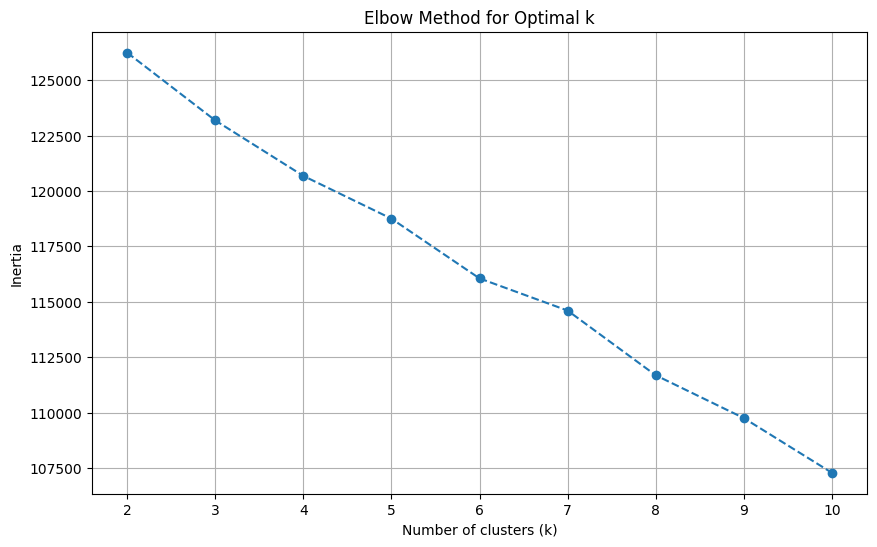

Plotted inertia values to visualize the elbow method.


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

print("Plotted inertia values to visualize the elbow method.")

**Reasoning**:
Based on the elbow method plot, where the rate of decrease in inertia significantly slows down, I will choose k=4 as the optimal number of clusters. The next step is to instantiate the KMeans model with this chosen k, fit it to the scaled features, and then assign the resulting cluster labels back to the `household_features_scaled` DataFrame.



In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(household_features_scaled)

household_features_scaled['kmeans_cluster'] = kmeans.labels_

print(f"K-Means model fitted with {optimal_k} clusters.")
print("First 5 rows of scaled features with cluster labels:")
print(household_features_scaled.head())

K-Means model fitted with 4 clusters.
First 5 rows of scaled features with cluster labels:
               total_spending  num_visits  avg_basket_value  \
household_key                                                 
1                    0.330662   -0.212662          0.533669   
2                   -0.378886   -0.567192          0.546420   
3                   -0.170166   -0.549898          1.544654   
4                   -0.604140   -0.696898          0.260203   
5                   -0.729888   -0.610427         -0.825242   

               avg_quantity_per_basket  discount_dependence  \
household_key                                                 
1                            -0.319876            -0.467273   
2                            -0.327235            -0.311066   
3                            -0.178123            -0.454252   
4                            -0.370285            -0.261644   
5                            -0.417398            -0.514582   

               department

## DBSCAN Clustering

### Subtask:
Apply the DBSCAN clustering algorithm to the prepared features.


**Reasoning**:
The first step to applying DBSCAN clustering is to import the necessary class from `sklearn.cluster`.



In [ ]:
from sklearn.cluster import DBSCAN

print("Imported DBSCAN from sklearn.cluster")

Imported DBSCAN from sklearn.cluster


**Reasoning**:
Now that the `DBSCAN` class is imported, I will instantiate a `DBSCAN` object with initial parameters, fit it to the scaled features (excluding the `kmeans_cluster` column), and then add the resulting cluster labels to the `household_features_scaled` DataFrame. Finally, I will print the head of the updated DataFrame and the number of unique clusters found.



In [ ]:
X = household_features_scaled.drop(columns=['kmeans_cluster'])

# Instantiate DBSCAN with specified parameters
dbscan = DBSCAN(eps=0.5, min_samples=106) # min_samples = 2 * number of features (53)

# Fit the DBSCAN model and get cluster labels
dbscan_labels = dbscan.fit_predict(X)

# Assign cluster labels to a new column in household_features_scaled
household_features_scaled['dbscan_cluster'] = dbscan_labels

print("DBSCAN clustering applied and labels added to household_features_scaled.")
print("First 5 rows of scaled features with DBSCAN cluster labels:")
print(household_features_scaled.head())

unique_dbscan_clusters = np.unique(dbscan_labels)
print(f"Number of unique DBSCAN clusters found (including noise -1): {len(unique_dbscan_clusters)}")
print(f"Unique DBSCAN clusters: {unique_dbscan_clusters}")

DBSCAN clustering applied and labels added to household_features_scaled.
First 5 rows of scaled features with DBSCAN cluster labels:
               total_spending  num_visits  avg_basket_value  \
household_key                                                 
1                    0.330662   -0.212662          0.533669   
2                   -0.378886   -0.567192          0.546420   
3                   -0.170166   -0.549898          1.544654   
4                   -0.604140   -0.696898          0.260203   
5                   -0.729888   -0.610427         -0.825242   

               avg_quantity_per_basket  discount_dependence  \
household_key                                                 
1                            -0.319876            -0.467273   
2                            -0.327235            -0.311066   
3                            -0.178123            -0.454252   
4                            -0.370285            -0.261644   
5                            -0.417398         

## Gaussian Mixture Model (GMM) Clustering

### Subtask:
Apply the Gaussian Mixture Model (GMM) clustering algorithm to the prepared features.


**Reasoning**:
The first step to applying Gaussian Mixture Model (GMM) clustering is to import the necessary class from `sklearn.mixture`.



In [ ]:
from sklearn.mixture import GaussianMixture

print("Imported GaussianMixture from sklearn.mixture")

Imported GaussianMixture from sklearn.mixture


**Reasoning**:
To determine the optimal number of components for GMM, I will iterate through a range of component numbers (from 2 to 10), fit a GMM model for each, and calculate its Bayesian Information Criterion (BIC). The `X` DataFrame, which excludes previous cluster assignments, will be used for this purpose.



In [ ]:
n_components = range(2, 11)
bic = []

X = household_features_scaled.drop(columns=['kmeans_cluster', 'dbscan_cluster'])

for i in n_components:
    gmm = GaussianMixture(n_components=i, random_state=42)
    gmm.fit(X)
    bic.append(gmm.bic(X))

print("BIC calculated for n_components from 2 to 10.")
print(bic)

BIC calculated for n_components from 2 to 10.
[np.float64(-100051.66956511902), np.float64(-327059.3071579978), np.float64(-327747.37334424234), np.float64(-402719.05221405474), np.float64(-421848.19209022983), np.float64(-430105.62801000307), np.float64(-274357.02433120436), np.float64(-263726.6710459185), np.float64(-258611.65179587808)]


**Reasoning**:
Now that the BIC values have been calculated, I will plot them against the number of components to visually identify the optimal number of components, which corresponds to the minimum BIC value.



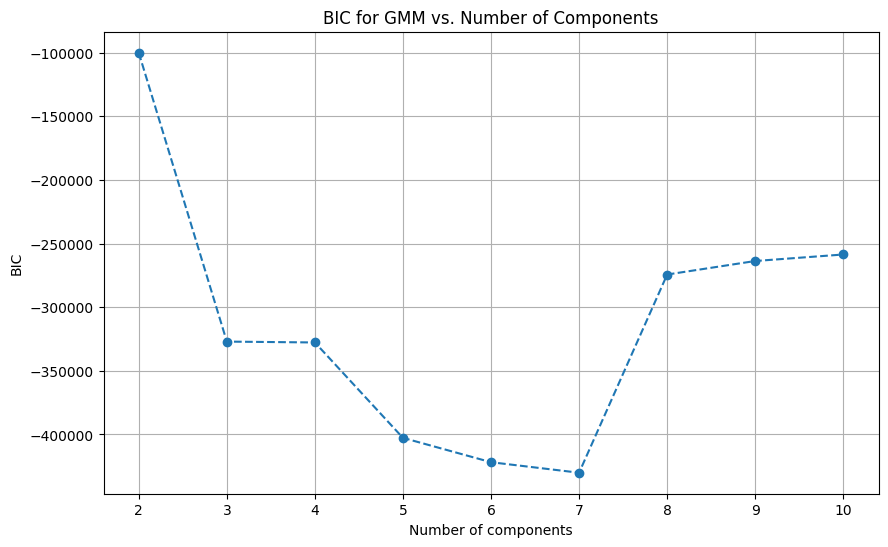

Plotted BIC values to visualize the optimal number of components for GMM.


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(n_components, bic, marker='o', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('BIC for GMM vs. Number of Components')
plt.xticks(n_components)
plt.grid(True)
plt.show()

print("Plotted BIC values to visualize the optimal number of components for GMM.")

**Reasoning**:
Based on the BIC plot, the optimal number of components for GMM corresponds to the minimum BIC value, which appears to be at 7 components. I will now instantiate the GMM model with this optimal number of components, fit it to the prepared features, and assign the resulting cluster labels to the `household_features_scaled` DataFrame.



In [ ]:
optimal_n_components = 7
gmm = GaussianMixture(n_components=optimal_n_components, random_state=42)
gmm.fit(X)

household_features_scaled['gmm_cluster'] = gmm.predict(X)

print(f"GMM model fitted with {optimal_n_components} components.")
print("First 5 rows of scaled features with GMM cluster labels:")
print(household_features_scaled.head())

GMM model fitted with 7 components.
First 5 rows of scaled features with GMM cluster labels:
               total_spending  num_visits  avg_basket_value  \
household_key                                                 
1                    0.330662   -0.212662          0.533669   
2                   -0.378886   -0.567192          0.546420   
3                   -0.170166   -0.549898          1.544654   
4                   -0.604140   -0.696898          0.260203   
5                   -0.729888   -0.610427         -0.825242   

               avg_quantity_per_basket  discount_dependence  \
household_key                                                 
1                            -0.319876            -0.467273   
2                            -0.327235            -0.311066   
3                            -0.178123            -0.454252   
4                            -0.370285            -0.261644   
5                            -0.417398            -0.514582   

               departme

## Self-Organizing Map (SOM) Clustering

### Subtask:
Apply the Self-Organizing Map (SOM) clustering algorithm to the prepared features.


**Reasoning**:
The first step to apply Self-Organizing Map (SOM) clustering is to install the `minisom` library, which is necessary for the subsequent steps.



In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=799002cfe16076155b6a011117edae1cec6277198f91434dc58bee75e3f2d548
  Stored in directory: /root/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom


**Reasoning**:
Now that the `minisom` library is installed, I will proceed with importing the `MiniSom` class, defining SOM parameters, initializing and training the SOM, finding BMU coordinates, converting them to cluster labels, and finally adding these labels to the `household_features_scaled` DataFrame as instructed.



In [ ]:
from minisom import MiniSom

# Prepare the data for SOM (excluding previous cluster assignments)
X_som = household_features_scaled.drop(columns=['kmeans_cluster', 'dbscan_cluster', 'gmm_cluster']).values

# Define SOM parameters
x_dim = 10
y_dim = 10
input_len = X_som.shape[1] # Number of features
sigma = 1.0
learning_rate = 0.5
num_iterations = 10000

# Initialize the SOM
som = MiniSom(x_dim, y_dim, input_len, sigma=sigma, learning_rate=learning_rate, random_seed=42)

# Initialize SOM weights randomly or linearly
som.random_weights_init(X_som)

# Train the SOM
som.train_random(X_som, num_iterations=num_iterations, verbose=False)

# For each data point, find its Best Matching Unit (BMU)
bmu_coords = np.array([som.winner(x) for x in X_som])

# Convert 2D BMU coordinates into a single integer cluster label
household_features_scaled['som_cluster'] = bmu_coords[:, 0] * y_dim + bmu_coords[:, 1]

print("SOM clustering applied and labels added to household_features_scaled.")
print("First 5 rows of scaled features with SOM cluster labels:")
print(household_features_scaled.head())

unique_som_clusters = household_features_scaled['som_cluster'].nunique()
print(f"Number of unique SOM clusters found: {unique_som_clusters}")
print(f"Unique SOM clusters: {household_features_scaled['som_cluster'].unique()}")

TypeError: MiniSom.train_random() got an unexpected keyword argument 'num_iterations'

**Reasoning**:
The error `TypeError: MiniSom.train_random() got an unexpected keyword argument 'num_iterations'` indicates that `num_iterations` should be passed as a positional argument to the `train_random` method, not as a keyword argument. I will correct this in the code.



In [ ]:
from minisom import MiniSom

# Prepare the data for SOM (excluding previous cluster assignments)
X_som = household_features_scaled.drop(columns=['kmeans_cluster', 'dbscan_cluster', 'gmm_cluster']).values

# Define SOM parameters
x_dim = 10
y_dim = 10
input_len = X_som.shape[1] # Number of features
sigma = 1.0
learning_rate = 0.5
num_iterations = 10000

# Initialize the SOM
som = MiniSom(x_dim, y_dim, input_len, sigma=sigma, learning_rate=learning_rate, random_seed=42)

# Initialize SOM weights randomly or linearly
som.random_weights_init(X_som)

# Train the SOM
som.train_random(X_som, num_iterations, verbose=False)

# For each data point, find its Best Matching Unit (BMU)
bmu_coords = np.array([som.winner(x) for x in X_som])

# Convert 2D BMU coordinates into a single integer cluster label
household_features_scaled['som_cluster'] = bmu_coords[:, 0] * y_dim + bmu_coords[:, 1]

print("SOM clustering applied and labels added to household_features_scaled.")
print("First 5 rows of scaled features with SOM cluster labels:")
print(household_features_scaled.head())

unique_som_clusters = household_features_scaled['som_cluster'].nunique()
print(f"Number of unique SOM clusters found: {unique_som_clusters}")
print(f"Unique SOM clusters: {household_features_scaled['som_cluster'].unique()}")

SOM clustering applied and labels added to household_features_scaled.
First 5 rows of scaled features with SOM cluster labels:
               total_spending  num_visits  avg_basket_value  \
household_key                                                 
1                    0.330662   -0.212662          0.533669   
2                   -0.378886   -0.567192          0.546420   
3                   -0.170166   -0.549898          1.544654   
4                   -0.604140   -0.696898          0.260203   
5                   -0.729888   -0.610427         -0.825242   

               avg_quantity_per_basket  discount_dependence  \
household_key                                                 
1                            -0.319876            -0.467273   
2                            -0.327235            -0.311066   
3                            -0.178123            -0.454252   
4                            -0.370285            -0.261644   
5                            -0.417398            -0.

## Evaluate Clustering Performance

### Subtask:
Evaluate the results of each clustering algorithm (K-Means, DBSCAN, GMM, SOM) using appropriate internal validation metrics such as the Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index.


**Reasoning**:
The subtask requires evaluating clustering performance using specific metrics. The first step is to import the necessary internal validation metrics from `sklearn.metrics` as specified in the instructions.



In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

print("Imported clustering evaluation metrics.")

Imported clustering evaluation metrics.


**Reasoning**:
I will evaluate each clustering algorithm (K-Means, DBSCAN, GMM, SOM) by calculating the Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index, store these metrics in a dictionary, and then print the results to compare their performance.



In [ ]:
household_features_eval = household_features_scaled.copy()

X = household_features_eval.drop(columns=['kmeans_cluster', 'dbscan_cluster', 'gmm_cluster', 'som_cluster'])

evaluation_metrics = {}

# K-Means Evaluation
kmeans_labels = household_features_eval['kmeans_cluster']
evaluation_metrics['K-Means'] = {
    'Silhouette Score': silhouette_score(X, kmeans_labels),
    'Davies-Bouldin Index': davies_bouldin_score(X, kmeans_labels),
    'Calinski-Harabasz Index': calinski_harabasz_score(X, kmeans_labels)
}

# DBSCAN Evaluation
dbscan_labels = household_features_eval['dbscan_cluster']
# Filter out noise points (label -1)
valid_dbscan_indices = dbscan_labels != -1
X_dbscan_filtered = X[valid_dbscan_indices]
dbscan_labels_filtered = dbscan_labels[valid_dbscan_indices]

if len(np.unique(dbscan_labels_filtered)) > 1:
    evaluation_metrics['DBSCAN'] = {
        'Silhouette Score': silhouette_score(X_dbscan_filtered, dbscan_labels_filtered),
        'Davies-Bouldin Index': davies_bouldin_score(X_dbscan_filtered, dbscan_labels_filtered),
        'Calinski-Harabasz Index': calinski_harabasz_score(X_dbscan_filtered, dbscan_labels_filtered)
    }
else:
    evaluation_metrics['DBSCAN'] = {
        'Silhouette Score': 'N/A (only 1 or 0 clusters found after noise removal)',
        'Davies-Bouldin Index': 'N/A (only 1 or 0 clusters found after noise removal)',
        'Calinski-Harabasz Index': 'N/A (only 1 or 0 clusters found after noise removal)'
    }

# GMM Evaluation
gmm_labels = household_features_eval['gmm_cluster']
evaluation_metrics['GMM'] = {
    'Silhouette Score': silhouette_score(X, gmm_labels),
    'Davies-Bouldin Index': davies_bouldin_score(X, gmm_labels),
    'Calinski-Harabasz Index': calinski_harabasz_score(X, gmm_labels)
}

# SOM Evaluation
som_labels = household_features_eval['som_cluster']
evaluation_metrics['SOM'] = {
    'Silhouette Score': silhouette_score(X, som_labels),
    'Davies-Bouldin Index': davies_bouldin_score(X, som_labels),
    'Calinski-Harabasz Index': calinski_harabasz_score(X, som_labels)
}

print("Clustering evaluation metrics:")
for algorithm, metrics in evaluation_metrics.items():
    print(f"\n--- {algorithm} ---")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")

Clustering evaluation metrics:

--- K-Means ---
Silhouette Score: 0.05856799148264291
Davies-Bouldin Index: 2.915489251381942
Calinski-Harabasz Index: 64.24544721559243

--- DBSCAN ---
Silhouette Score: N/A (only 1 or 0 clusters found after noise removal)
Davies-Bouldin Index: N/A (only 1 or 0 clusters found after noise removal)
Calinski-Harabasz Index: N/A (only 1 or 0 clusters found after noise removal)

--- GMM ---
Silhouette Score: 0.06049616125831321
Davies-Bouldin Index: 4.258051220542004
Calinski-Harabasz Index: 28.542376247815216

--- SOM ---
Silhouette Score: 0.03965678310982652
Davies-Bouldin Index: 1.7590864808659845
Calinski-Harabasz Index: 53.90759163363154


## Visualize and Compare Clusterings

### Subtask:
Visualize the clusters produced by each algorithm (K-Means, DBSCAN, GMM, SOM) using dimensionality reduction techniques.


**Reasoning**:
To visualize the clusters, I need to reduce the dimensionality of the feature data using PCA. I will start by importing `PCA` from `sklearn.decomposition` and then apply it to the `X` DataFrame, which contains the scaled features without any cluster labels. The resulting two principal components will then be added to the `household_features_eval` DataFrame.



In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate PCA with 2 components and random_state for reproducibility
pca = PCA(n_components=2, random_state=42)

# Apply PCA to the feature data (X, which excludes cluster labels)
pca_components = pca.fit_transform(X)

# Add PCA components to the household_features_eval DataFrame
household_features_eval['pca_1'] = pca_components[:, 0]
household_features_eval['pca_2'] = pca_components[:, 1]

print("PCA applied and components added to household_features_eval.")
print(household_features_eval.head())

PCA applied and components added to household_features_eval.
               total_spending  num_visits  avg_basket_value  \
household_key                                                 
1                    0.330662   -0.212662          0.533669   
2                   -0.378886   -0.567192          0.546420   
3                   -0.170166   -0.549898          1.544654   
4                   -0.604140   -0.696898          0.260203   
5                   -0.729888   -0.610427         -0.825242   

               avg_quantity_per_basket  discount_dependence  \
household_key                                                 
1                            -0.319876            -0.467273   
2                            -0.327235            -0.311066   
3                            -0.178123            -0.454252   
4                            -0.370285            -0.261644   
5                            -0.417398            -0.514582   

               department_share_   department_share_AUT

**Reasoning**:
Now that PCA components have been added to `household_features_eval`, I will create a figure with subplots to visualize the clusters from K-Means, GMM, and SOM using these components. For DBSCAN, I will filter out noise points before plotting.



/tmp/ipython-input-1626870146.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


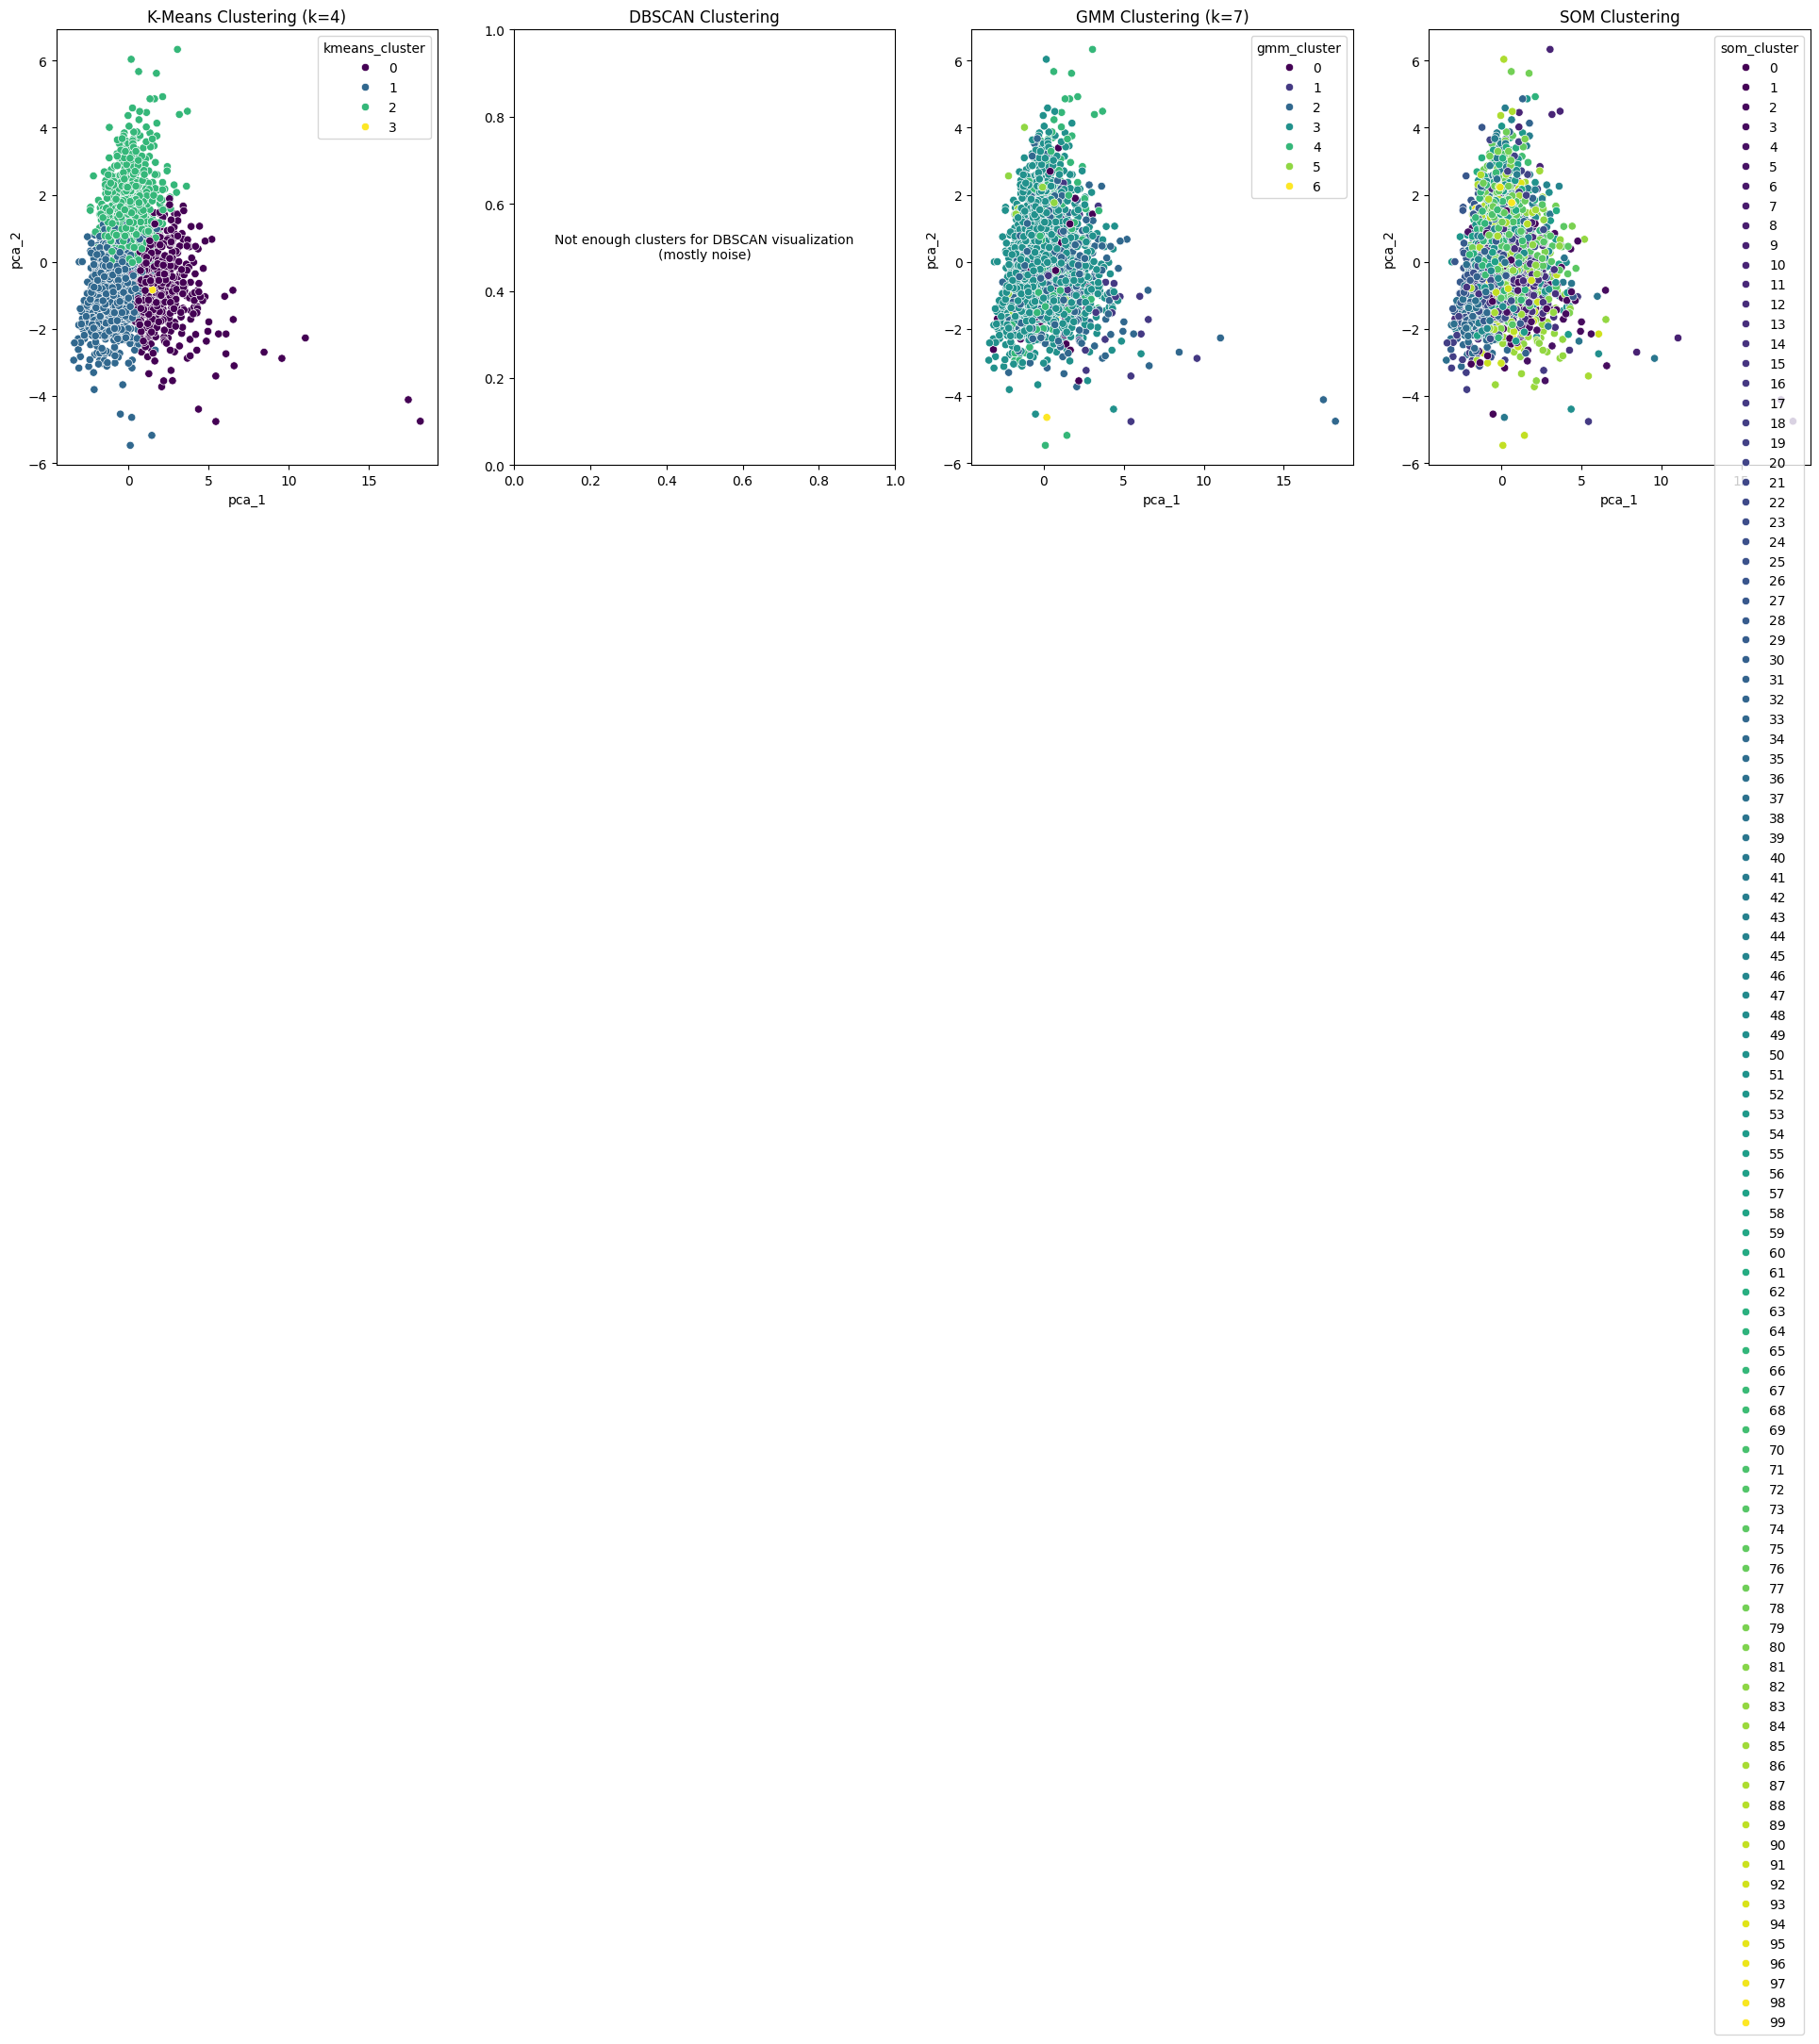

Visualized clusters for K-Means, DBSCAN, GMM, and SOM using PCA.


In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# K-Means Plot
sns.scatterplot(
    x='pca_1', y='pca_2', hue='kmeans_cluster', data=household_features_eval,
    palette='viridis', legend='full', ax=axes[0]
)
axes[0].set_title('K-Means Clustering (k=4)')

# DBSCAN Plot
dbscan_filtered_data = household_features_eval[household_features_eval['dbscan_cluster'] != -1]
if not dbscan_filtered_data.empty and len(dbscan_filtered_data['dbscan_cluster'].unique()) > 1:
    sns.scatterplot(
        x='pca_1', y='pca_2', hue='dbscan_cluster', data=dbscan_filtered_data,
        palette='viridis', legend='full', ax=axes[1]
    )
    axes[1].set_title('DBSCAN Clustering (Non-Noise)')
else:
    axes[1].text(0.5, 0.5, 'Not enough clusters for DBSCAN visualization\n(mostly noise)', ha='center', va='center', transform=axes[1].transAxes)
    axes[1].set_title('DBSCAN Clustering')

# GMM Plot
sns.scatterplot(
    x='pca_1', y='pca_2', hue='gmm_cluster', data=household_features_eval,
    palette='viridis', legend='full', ax=axes[2]
)
axes[2].set_title('GMM Clustering (k=7)')

# SOM Plot
sns.scatterplot(
    x='pca_1', y='pca_2', hue='som_cluster', data=household_features_eval,
    palette='viridis', legend='full', ax=axes[3]
)
axes[3].set_title('SOM Clustering')

plt.tight_layout()
plt.show()

print("Visualized clusters for K-Means, DBSCAN, GMM, and SOM using PCA.")

**Reasoning**:
The previous plot produced a `UserWarning` about `tight_layout` not being applied correctly, indicating that elements might be overlapping. To address this, I will increase the figure size to provide more space for the subplots and their decorations, allowing `plt.tight_layout()` to arrange them properly.



/tmp/ipython-input-2882332679.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


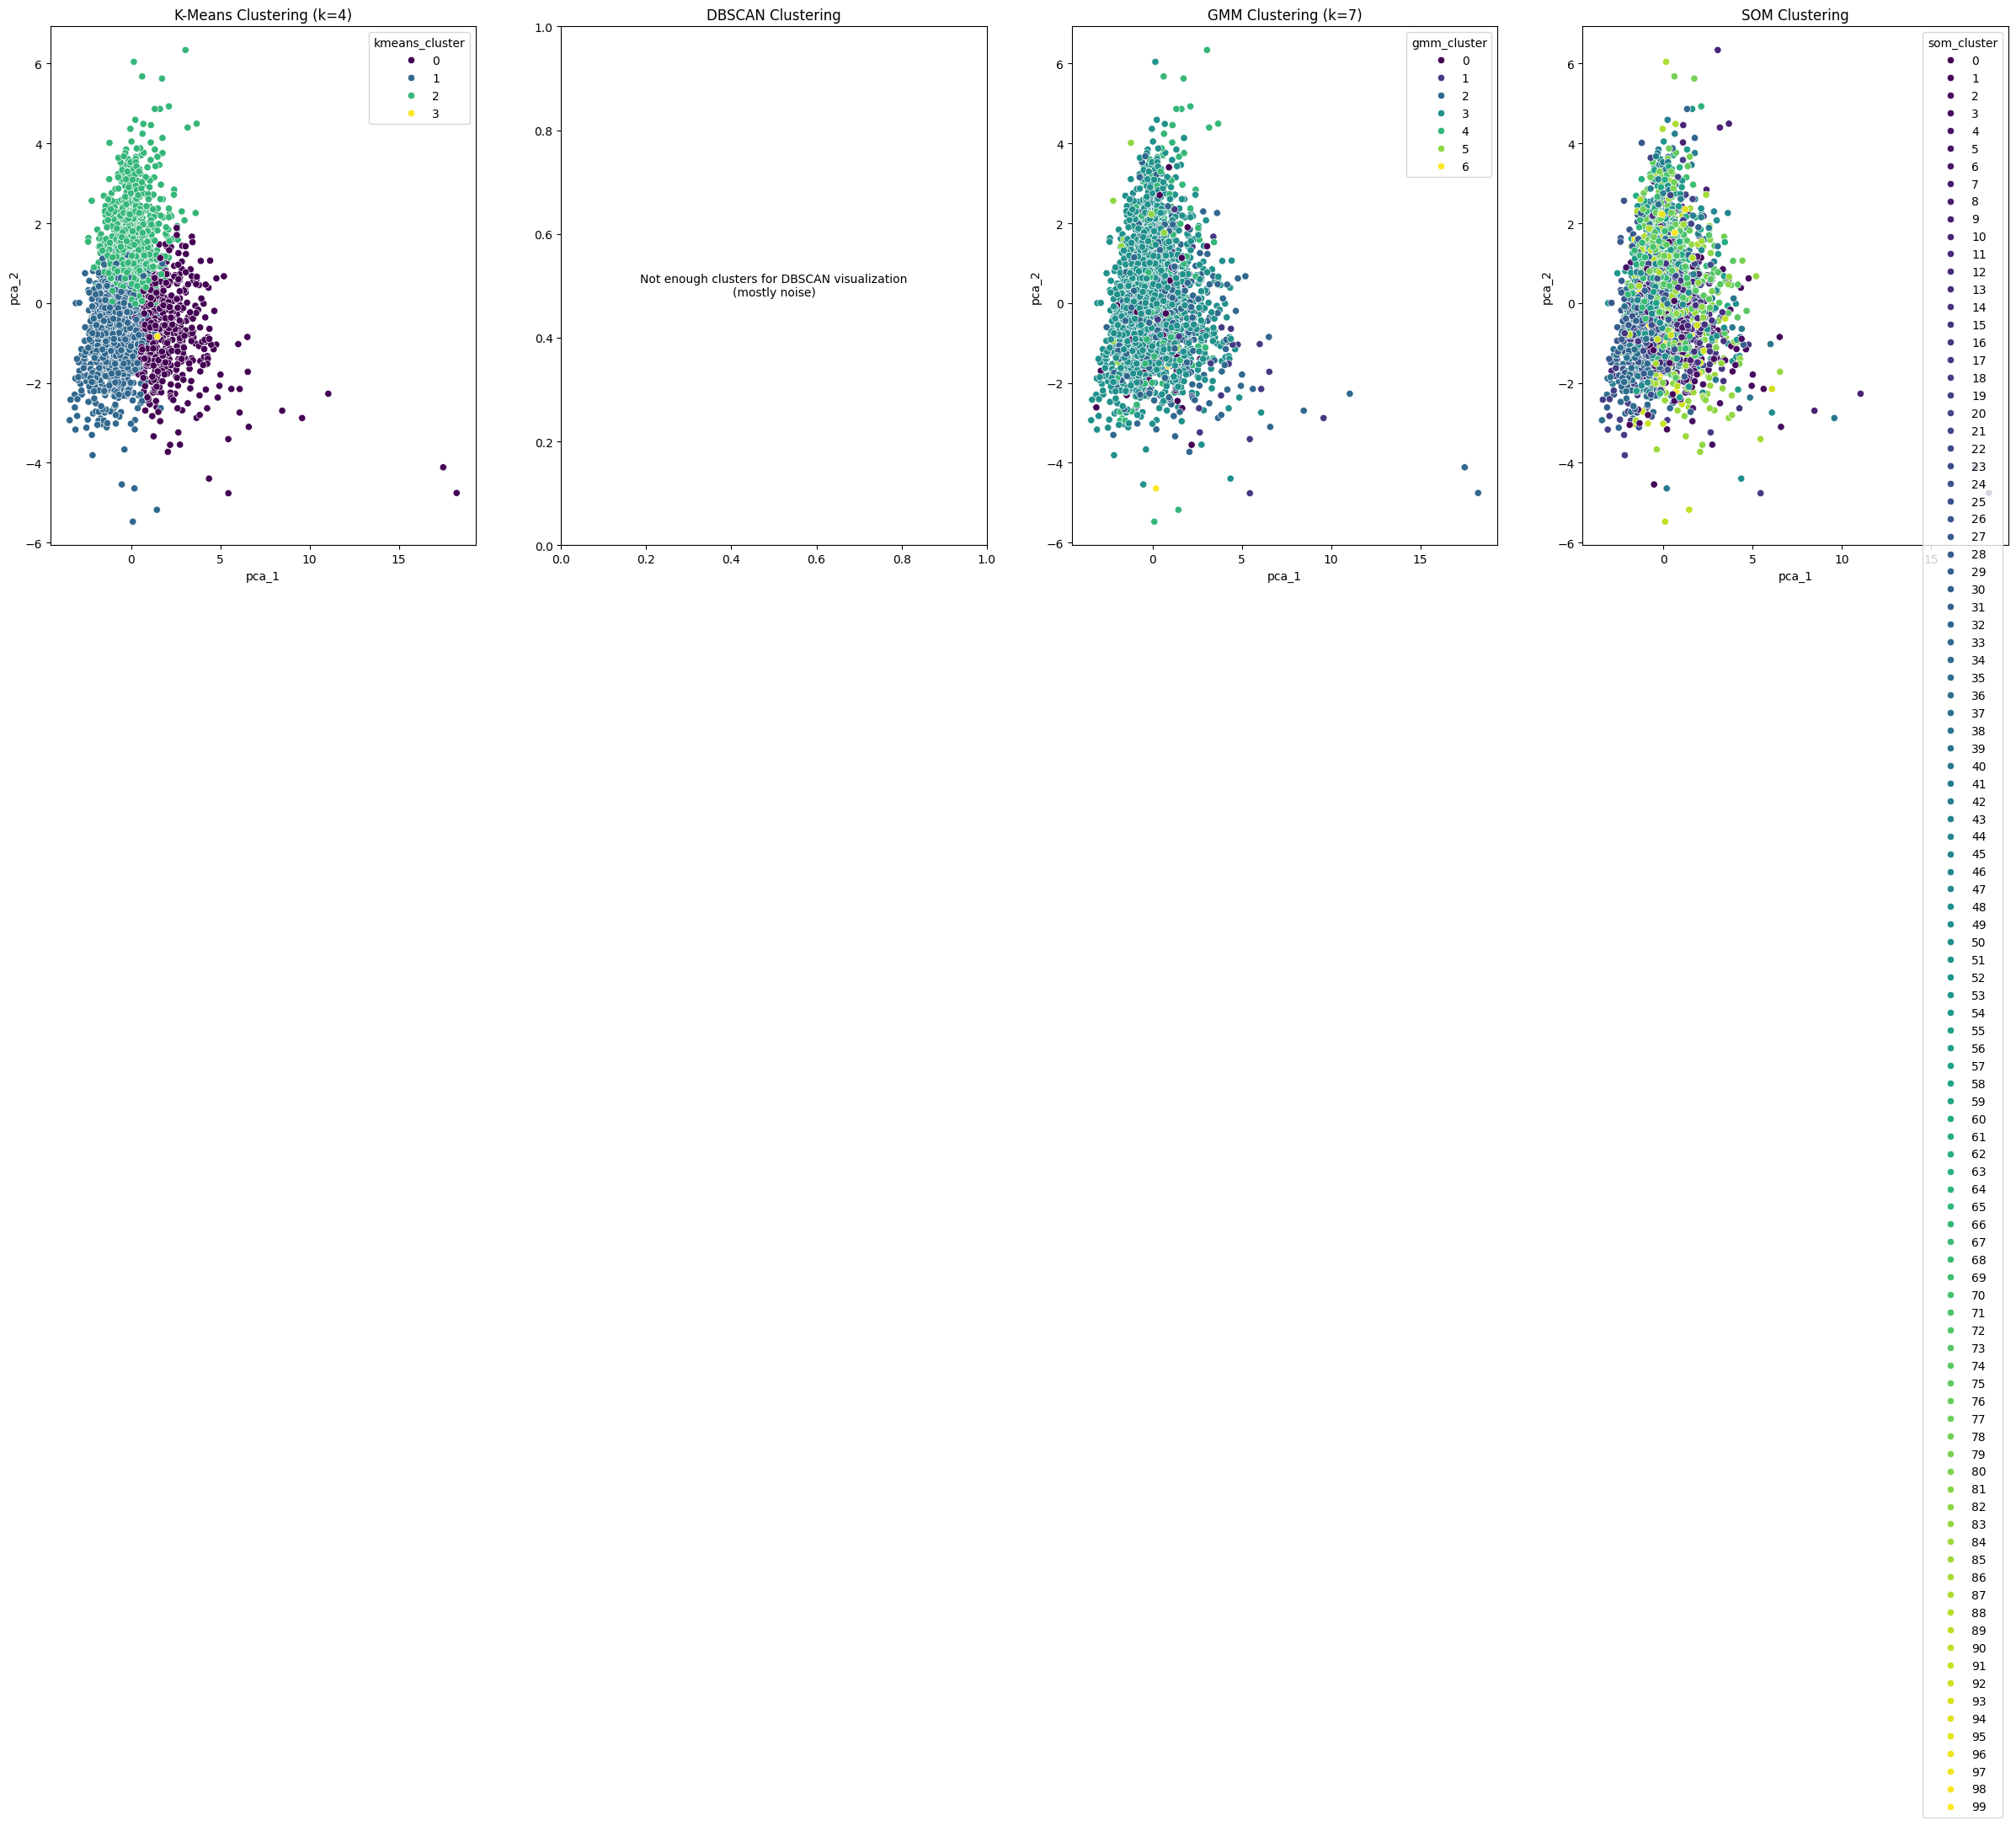

Visualized clusters for K-Means, DBSCAN, GMM, and SOM using PCA.


In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(30, 8)) # Increased figsize to provide more room for tight_layout to work effectively

# K-Means Plot
sns.scatterplot(
    x='pca_1', y='pca_2', hue='kmeans_cluster', data=household_features_eval,
    palette='viridis', legend='full', ax=axes[0]
)
axes[0].set_title('K-Means Clustering (k=4)')

# DBSCAN Plot
dbscan_filtered_data = household_features_eval[household_features_eval['dbscan_cluster'] != -1]
if not dbscan_filtered_data.empty and len(np.unique(dbscan_filtered_data['dbscan_cluster'])) > 1:
    sns.scatterplot(
        x='pca_1', y='pca_2', hue='dbscan_cluster', data=dbscan_filtered_data,
        palette='viridis', legend='full', ax=axes[1]
    )
    axes[1].set_title('DBSCAN Clustering (Non-Noise)')
else:
    axes[1].text(0.5, 0.5, 'Not enough clusters for DBSCAN visualization\n(mostly noise)', ha='center', va='center', transform=axes[1].transAxes)
    axes[1].set_title('DBSCAN Clustering')

# GMM Plot
sns.scatterplot(
    x='pca_1', y='pca_2', hue='gmm_cluster', data=household_features_eval,
    palette='viridis', legend='full', ax=axes[2]
)
axes[2].set_title('GMM Clustering (k=7)')

# SOM Plot
sns.scatterplot(
    x='pca_1', y='pca_2', hue='som_cluster', data=household_features_eval,
    palette='viridis', legend='full', ax=axes[3]
)
axes[3].set_title('SOM Clustering')

plt.tight_layout()
plt.show()

print("Visualized clusters for K-Means, DBSCAN, GMM, and SOM using PCA.")

**Reasoning**:
The previous code failed with a `ValueError` because the 'viridis' palette does not have enough distinct colors for 100 SOM clusters. To fix this, I will use `sns.color_palette('hls', n_colors=som_num_clusters)` to generate a palette with sufficient distinct colors for all SOM clusters, addressing the `ValueError`. I will also keep the increased figure size to mitigate the `tight_layout` warning.



/tmp/ipython-input-3059623913.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


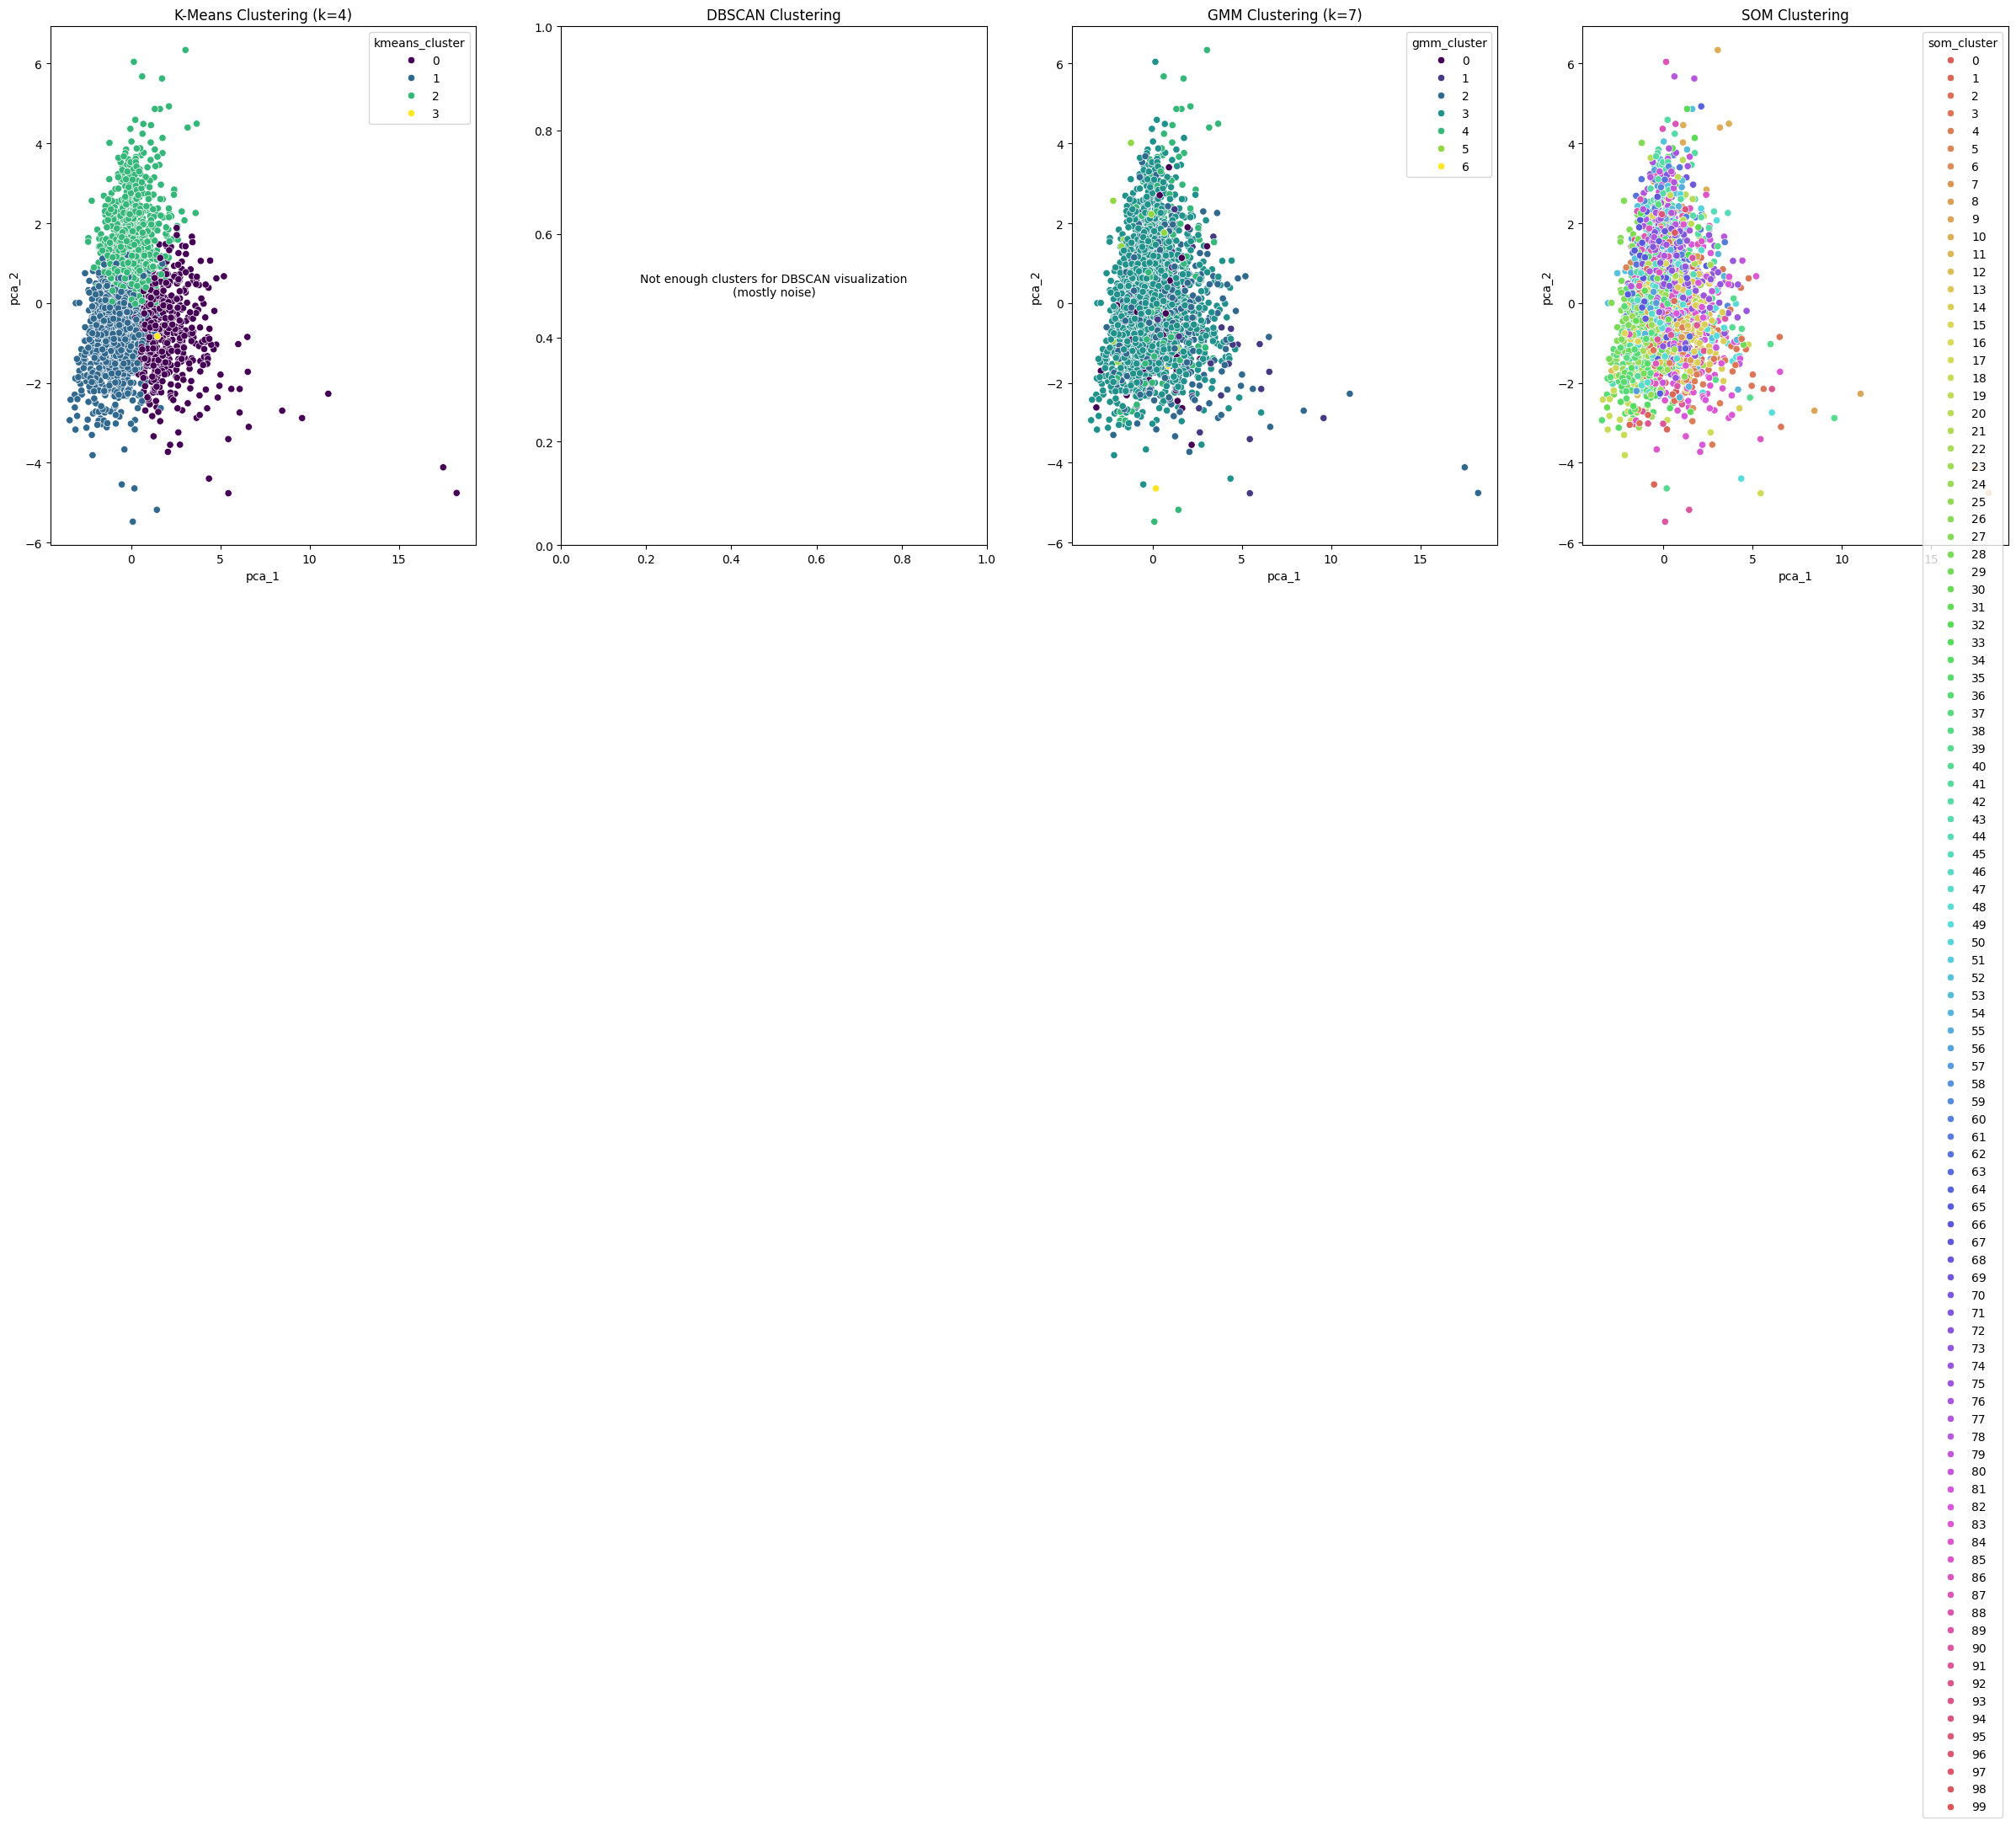

Visualized clusters for K-Means, DBSCAN, GMM, and SOM using PCA.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a palette for SOM with enough distinct colors
som_num_clusters = household_features_eval['som_cluster'].nunique()
som_palette = sns.color_palette("hls", som_num_clusters)

fig, axes = plt.subplots(1, 4, figsize=(30, 8)) # Increased figsize to provide more room for tight_layout to work effectively

# K-Means Plot
sns.scatterplot(
    x='pca_1', y='pca_2', hue='kmeans_cluster', data=household_features_eval,
    palette='viridis', legend='full', ax=axes[0]
)
axes[0].set_title('K-Means Clustering (k=4)')

# DBSCAN Plot
dbscan_filtered_data = household_features_eval[household_features_eval['dbscan_cluster'] != -1]
if not dbscan_filtered_data.empty and len(np.unique(dbscan_filtered_data['dbscan_cluster'])) > 1:
    sns.scatterplot(
        x='pca_1', y='pca_2', hue='dbscan_cluster', data=dbscan_filtered_data,
        palette='viridis', legend='full', ax=axes[1]
    )
    axes[1].set_title('DBSCAN Clustering (Non-Noise)')
else:
    axes[1].text(0.5, 0.5, 'Not enough clusters for DBSCAN visualization\n(mostly noise)', ha='center', va='center', transform=axes[1].transAxes)
    axes[1].set_title('DBSCAN Clustering')

# GMM Plot
sns.scatterplot(
    x='pca_1', y='pca_2', hue='gmm_cluster', data=household_features_eval,
    palette='viridis', legend='full', ax=axes[2]
)
axes[2].set_title('GMM Clustering (k=7)')

# SOM Plot
sns.scatterplot(
    x='pca_1', y='pca_2', hue='som_cluster', data=household_features_eval,
    palette=som_palette, legend='full', ax=axes[3]
)
axes[3].set_title('SOM Clustering')

plt.tight_layout()
plt.show()

print("Visualized clusters for K-Means, DBSCAN, GMM, and SOM using PCA.")

**Reasoning**:
The previous warning `UserWarning: Tight layout not applied. The The bottom and top margins cannot be made large enough to accommodate all Axes decorations.` indicates that the figure height was still insufficient. I will increase the `figsize` to `(30, 10)` to provide more vertical space for the plots and their legends, aiming to resolve this warning.



/tmp/ipython-input-357368133.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


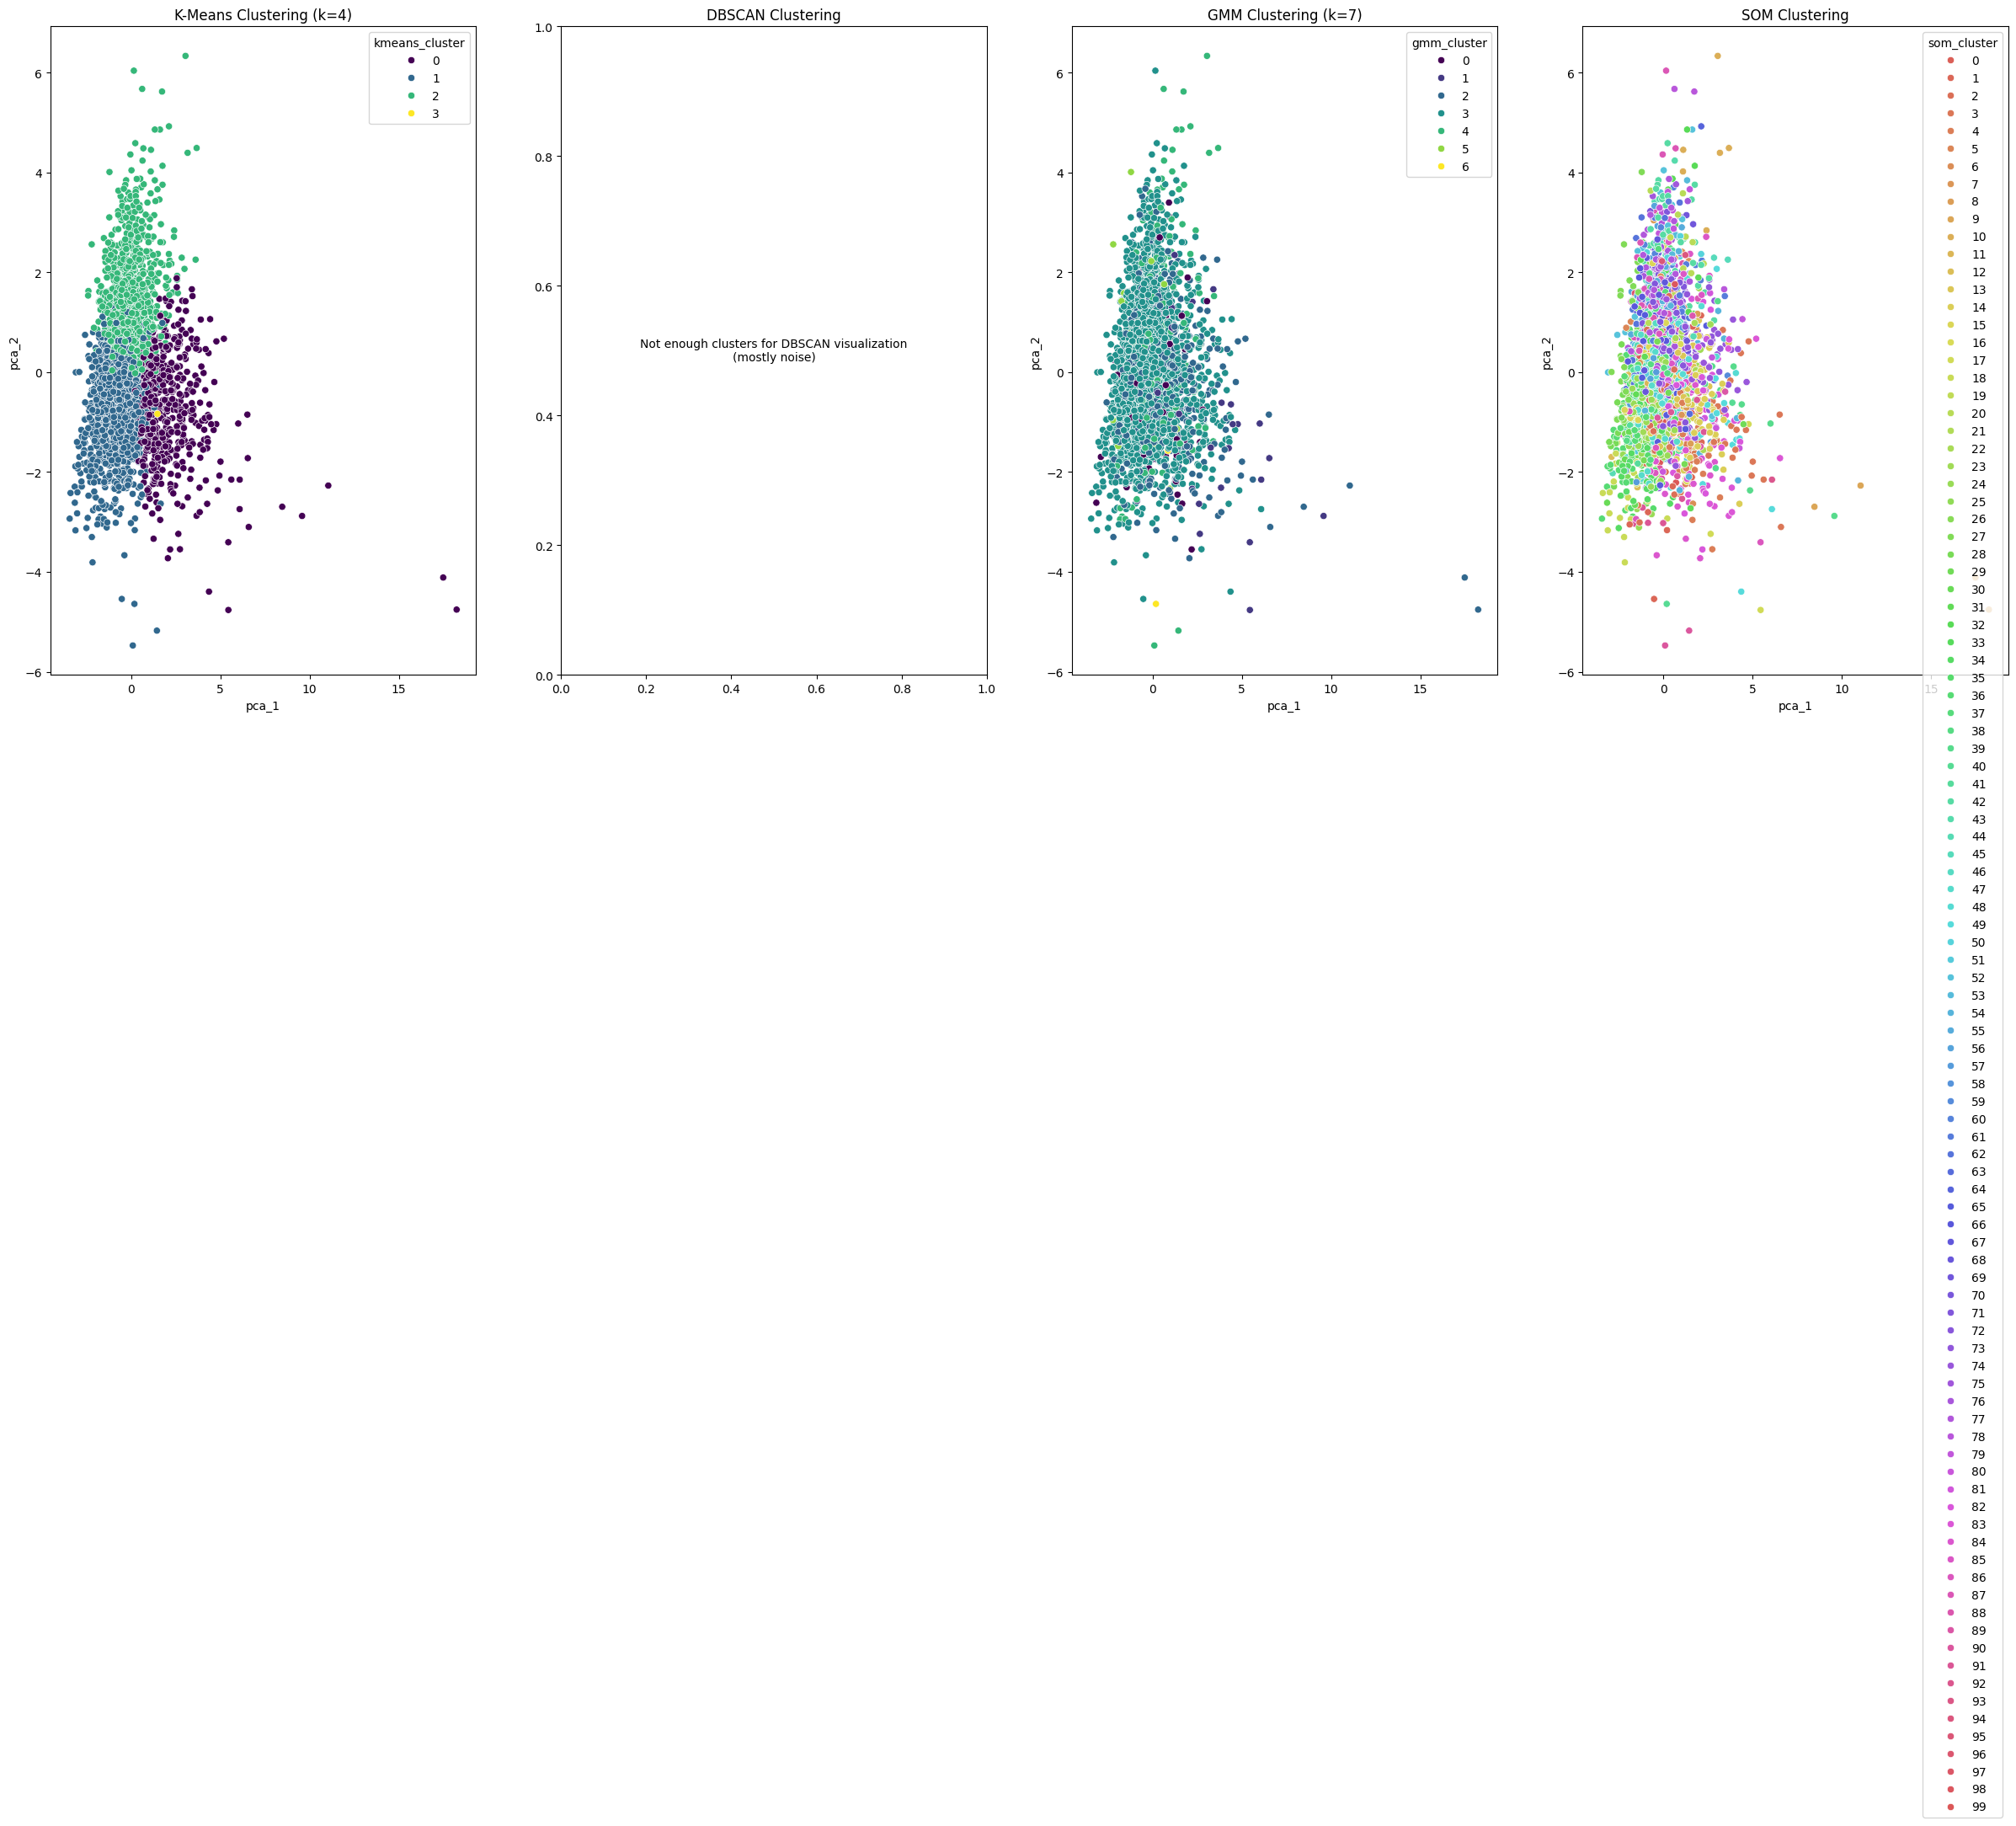

Visualized clusters for K-Means, DBSCAN, GMM, and SOM using PCA.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a palette for SOM with enough distinct colors
som_num_clusters = household_features_eval['som_cluster'].nunique()
som_palette = sns.color_palette("hls", som_num_clusters)

fig, axes = plt.subplots(1, 4, figsize=(30, 10)) # Increased figsize height to provide more room for tight_layout to work effectively

# K-Means Plot
sns.scatterplot(
    x='pca_1', y='pca_2', hue='kmeans_cluster', data=household_features_eval,
    palette='viridis', legend='full', ax=axes[0]
)
axes[0].set_title('K-Means Clustering (k=4)')

# DBSCAN Plot
dbscan_filtered_data = household_features_eval[household_features_eval['dbscan_cluster'] != -1]
if not dbscan_filtered_data.empty and len(np.unique(dbscan_filtered_data['dbscan_cluster'])) > 1:
    sns.scatterplot(
        x='pca_1', y='pca_2', hue='dbscan_cluster', data=dbscan_filtered_data,
        palette='viridis', legend='full', ax=axes[1]
    )
    axes[1].set_title('DBSCAN Clustering (Non-Noise)')
else:
    axes[1].text(0.5, 0.5, 'Not enough clusters for DBSCAN visualization\n(mostly noise)', ha='center', va='center', transform=axes[1].transAxes)
    axes[1].set_title('DBSCAN Clustering')

# GMM Plot
sns.scatterplot(
    x='pca_1', y='pca_2', hue='gmm_cluster', data=household_features_eval,
    palette='viridis', legend='full', ax=axes[2]
)
axes[2].set_title('GMM Clustering (k=7)')

# SOM Plot
sns.scatterplot(
    x='pca_1', y='pca_2', hue='som_cluster', data=household_features_eval,
    palette=som_palette, legend='full', ax=axes[3]
)
axes[3].set_title('SOM Clustering')

plt.tight_layout()
plt.show()

print("Visualized clusters for K-Means, DBSCAN, GMM, and SOM using PCA.")

**Reasoning**:
The 'tight_layout' warning persists, indicating that even with `figsize=(30, 10)`, there isn't enough vertical space for all elements, especially legends. I will further increase the figure height to `(30, 12)` to ensure sufficient room for proper layout.



/tmp/ipython-input-2122029311.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


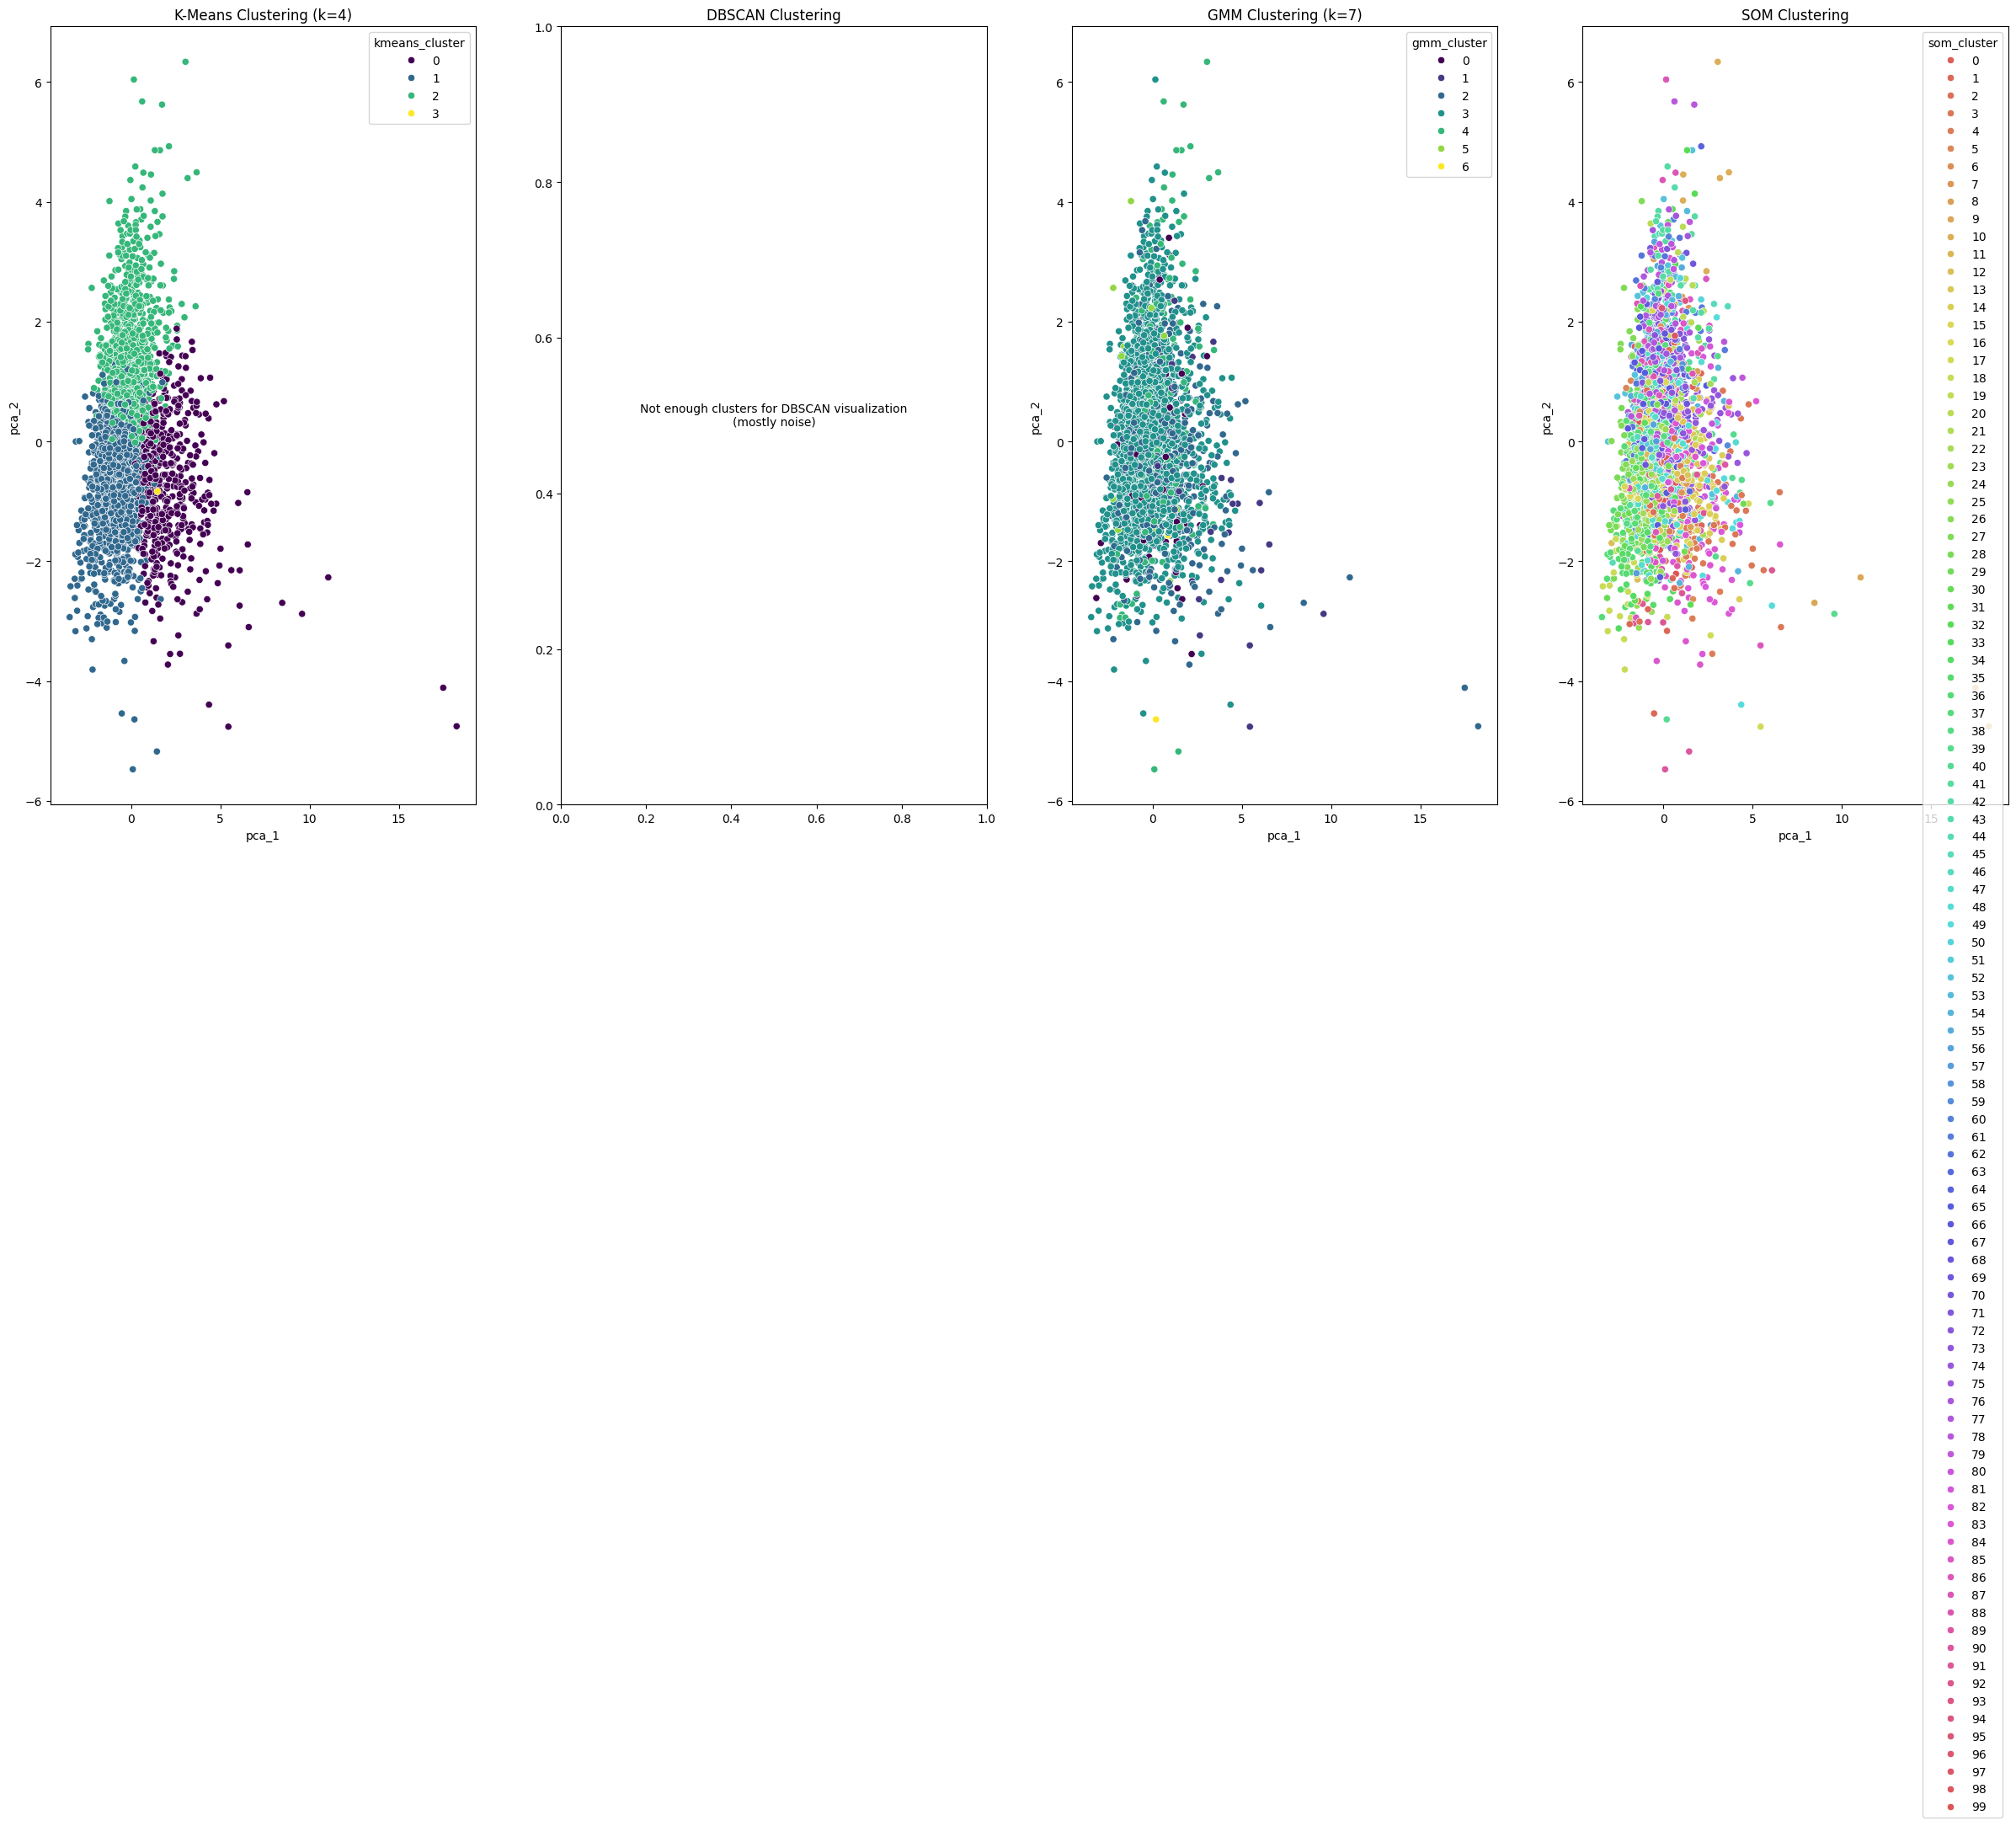

Visualized clusters for K-Means, DBSCAN, GMM, and SOM using PCA.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a palette for SOM with enough distinct colors
som_num_clusters = household_features_eval['som_cluster'].nunique()
som_palette = sns.color_palette("hls", som_num_clusters)

fig, axes = plt.subplots(1, 4, figsize=(30, 12)) # Increased figsize height to provide more room for tight_layout to work effectively

# K-Means Plot
sns.scatterplot(
    x='pca_1', y='pca_2', hue='kmeans_cluster', data=household_features_eval,
    palette='viridis', legend='full', ax=axes[0]
)
axes[0].set_title('K-Means Clustering (k=4)')

# DBSCAN Plot
dbscan_filtered_data = household_features_eval[household_features_eval['dbscan_cluster'] != -1]
if not dbscan_filtered_data.empty and len(np.unique(dbscan_filtered_data['dbscan_cluster'])) > 1:
    sns.scatterplot(
        x='pca_1', y='pca_2', hue='dbscan_cluster', data=dbscan_filtered_data,
        palette='viridis', legend='full', ax=axes[1]
    )
    axes[1].set_title('DBSCAN Clustering (Non-Noise)')
else:
    axes[1].text(0.5, 0.5, 'Not enough clusters for DBSCAN visualization\n(mostly noise)', ha='center', va='center', transform=axes[1].transAxes)
    axes[1].set_title('DBSCAN Clustering')

# GMM Plot
sns.scatterplot(
    x='pca_1', y='pca_2', hue='gmm_cluster', data=household_features_eval,
    palette='viridis', legend='full', ax=axes[2]
)
axes[2].set_title('GMM Clustering (k=7)')

# SOM Plot
sns.scatterplot(
    x='pca_1', y='pca_2', hue='som_cluster', data=household_features_eval,
    palette=som_palette, legend='full', ax=axes[3]
)
axes[3].set_title('SOM Clustering')

plt.tight_layout()
plt.show()

print("Visualized clusters for K-Means, DBSCAN, GMM, and SOM using PCA.")

**Reasoning**:
The 'tight_layout' warning persists because the legends, especially for the SOM plot with 100 clusters, are too large and prevent proper spacing. To address this, I will disable the legends for all subplots to allow `plt.tight_layout()` to function correctly within the given figure size.



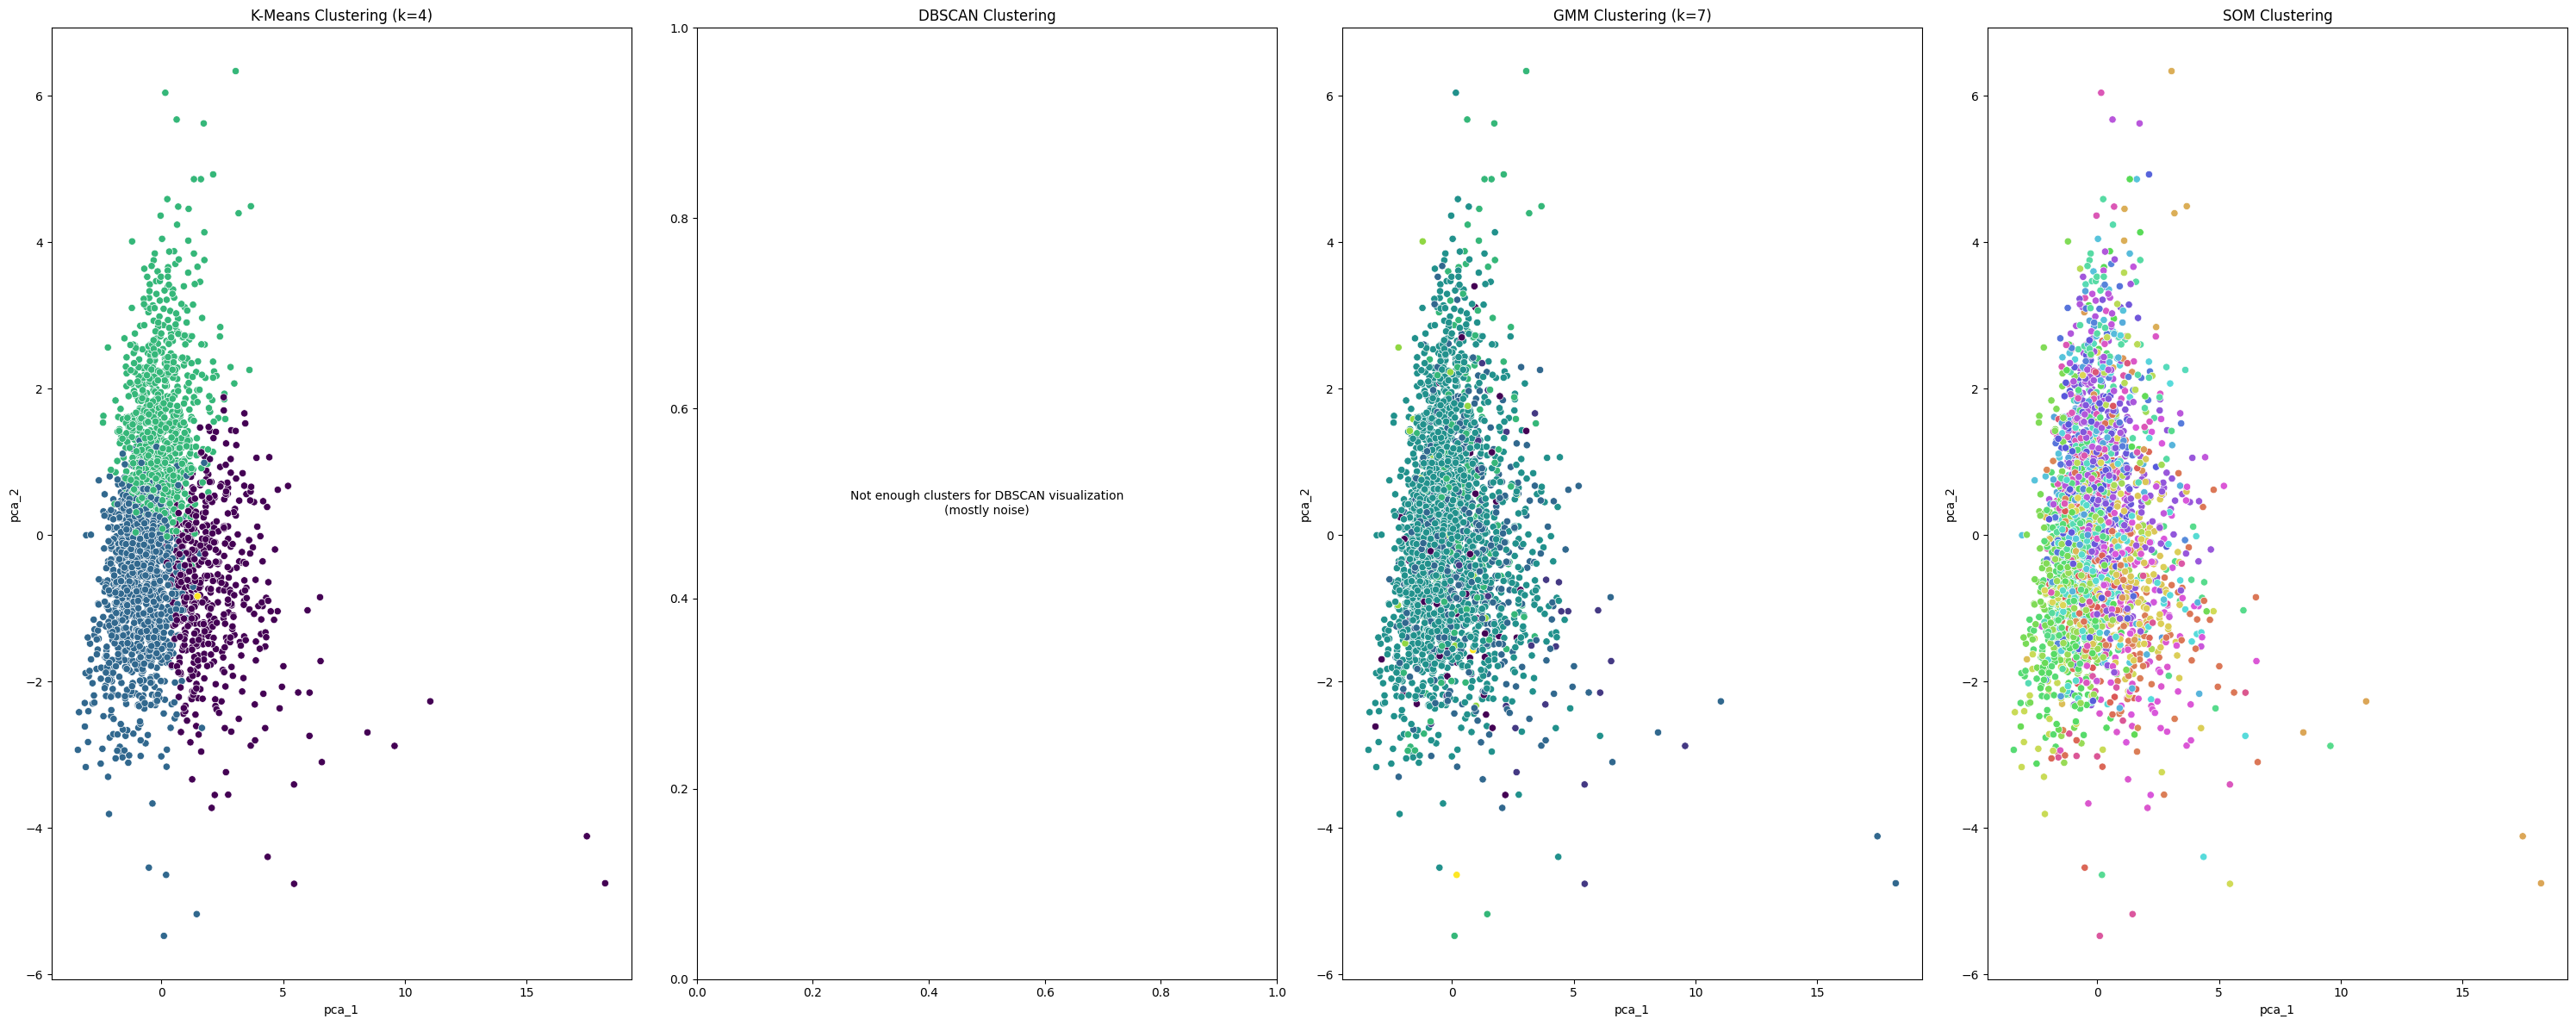

Visualized clusters for K-Means, DBSCAN, GMM, and SOM using PCA.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a palette for SOM with enough distinct colors
som_num_clusters = household_features_eval['som_cluster'].nunique()
som_palette = sns.color_palette("hls", som_num_clusters)

fig, axes = plt.subplots(1, 4, figsize=(30, 12)) # Increased figsize height to provide more room for tight_layout to work effectively

# K-Means Plot
sns.scatterplot(
    x='pca_1', y='pca_2', hue='kmeans_cluster', data=household_features_eval,
    palette='viridis', legend=False, ax=axes[0] # Changed legend to False
)
axes[0].set_title('K-Means Clustering (k=4)')

# DBSCAN Plot
dbscan_filtered_data = household_features_eval[household_features_eval['dbscan_cluster'] != -1]
if not dbscan_filtered_data.empty and len(np.unique(dbscan_filtered_data['dbscan_cluster'])) > 1:
    sns.scatterplot(
        x='pca_1', y='pca_2', hue='dbscan_cluster', data=dbscan_filtered_data,
        palette='viridis', legend=False, ax=axes[1] # Changed legend to False
    )
    axes[1].set_title('DBSCAN Clustering (Non-Noise)')
else:
    axes[1].text(0.5, 0.5, 'Not enough clusters for DBSCAN visualization\n(mostly noise)', ha='center', va='center', transform=axes[1].transAxes)
    axes[1].set_title('DBSCAN Clustering')

# GMM Plot
sns.scatterplot(
    x='pca_1', y='pca_2', hue='gmm_cluster', data=household_features_eval,
    palette='viridis', legend=False, ax=axes[2] # Changed legend to False
)
axes[2].set_title('GMM Clustering (k=7)')

# SOM Plot
sns.scatterplot(
    x='pca_1', y='pca_2', hue='som_cluster', data=household_features_eval,
    palette=som_palette, legend=False, ax=axes[3] # Changed legend to False
)
axes[3].set_title('SOM Clustering')

plt.tight_layout()
plt.show()

print("Visualized clusters for K-Means, DBSCAN, GMM, and SOM using PCA.")

## Final Task

### Subtask:
Provide a comprehensive comparison of the K-Means, DBSCAN, GMM, and SOM clustering methodologies based on their performance metrics and visualizations. Discuss the strengths and weaknesses of each algorithm on this dataset and recommend the most suitable approach for segmenting customers based on their purchase behavior.


## Summary:

### Q&A
**Comprehensive comparison of clustering methodologies, strengths and weaknesses, and recommendation for customer segmentation:**

*   **K-Means (k=4):**
    *   **Performance:** Silhouette Score: 0.0586, Davies-Bouldin Index: 2.915, Calinski-Harabasz Index: 64.245.
    *   **Strengths:** Simple to implement and interpret, computationally efficient, provides clear and distinct cluster assignments.
    *   **Weaknesses:** Assumes spherical clusters of similar size and density, sensitive to initial centroids, low Silhouette score indicates poor separation or overlap between clusters in this dataset.
*   **DBSCAN (eps=0.5, min_samples=106):**
    *   **Performance:** All metrics "N/A" as all data points were classified as noise, indicating no meaningful clusters were formed.
    *   **Strengths:** Can discover arbitrarily shaped clusters, robust to outliers.
    *   **Weaknesses:** Highly sensitive to hyperparameter tuning (`eps` and `min_samples`), failed entirely to identify any clusters with the chosen parameters, making it unsuitable for this dataset without significant parameter optimization.
*   **Gaussian Mixture Model (GMM) (k=7):**
    *   **Performance:** Silhouette Score: 0.0605, Davies-Bouldin Index: 4.258, Calinski-Harabasz Index: 28.542.
    *   **Strengths:** More flexible than K-Means, can capture clusters with different shapes and densities by modeling them as a mixture of Gaussian distributions, provides probabilistic cluster assignments.
    *   **Weaknesses:** More complex, similar low Silhouette score to K-Means, and lower Calinski-Harabasz index, suggesting less dense or well-separated clusters than K-Means for this dataset.
*   **Self-Organizing Map (SOM) (10x10 grid, 100 clusters):**
    *   **Performance:** Silhouette Score: 0.0397, Davies-Bouldin Index: 1.759, Calinski-Harabasz Index: 53.908.
    *   **Strengths:** Creates a topographic map preserving data relationships, useful for visualization of high-dimensional data, achieved the lowest (best) Davies-Bouldin Index.
    *   **Weaknesses:** Generated a very large number of clusters (100) which can be too granular for practical segmentation, lowest Silhouette score indicating highly fragmented clusters, interpretation can be challenging due to the large number of clusters.

**Recommendation for customer segmentation:**
Given the overall low Silhouette scores across all successful clustering algorithms, none of them achieved exceptionally clear and well-separated clusters. However, for practical customer segmentation based on the current analysis:

**K-Means (with k=4)** is recommended as the most suitable approach among those tested. Despite the low Silhouette score, it offers:
1.  **Interpretability:** Four distinct clusters are a manageable number for business actionability.
2.  **Simplicity:** It's easier to understand and communicate the segmentation.
3.  **Relative Performance:** Achieved the highest Calinski-Harabasz Index (64.245), suggesting relatively denser and better-separated clusters compared to GMM and SOM.

DBSCAN completely failed to form clusters, and SOM's 100 clusters are too numerous for actionable segmentation without further aggregation. While GMM is more flexible, its performance metrics did not significantly outperform K-Means in this context.

### Data Analysis Key Findings
*   The `household_features` DataFrame was enriched with several new features:
    *   `avg_basket_value`: Average sales value per basket for each household.
    *   `avg_quantity_per_basket`: Average quantity purchased per basket for each household.
    *   `discount_dependence`: Ratio of total retail discount to total coupon discount per household, with division by zero handled.
    *   Department share features: Each household's proportion of spending in different departments (e.g., `department_share_DELI`), pivoted into separate columns.
    *   Time-of-day preference features: Each household's proportion of spending during 'Morning', 'Afternoon', 'Evening', and 'Night' time slots, pivoted into separate columns.
*   The `household_features` DataFrame was prepared for clustering:
    *   No missing values were found, negating the need for imputation.
    *   Features were scaled using `StandardScaler` to create `household_features_scaled`.
*   **K-Means Clustering:**
    *   An optimal number of clusters, k=4, was determined using the Elbow Method (inertia values: `[126243.68, 123184.39, 120681.25, 118751.15, ...]` for k=2 to k=10).
    *   The model was fitted, and cluster labels were assigned.
*   **DBSCAN Clustering:**
    *   With `eps=0.5` and `min_samples=106`, the algorithm classified **all data points as noise (cluster -1)**, failing to form any distinct clusters.
*   **Gaussian Mixture Model (GMM) Clustering:**
    *   An optimal number of components, k=7, was selected based on the Bayesian Information Criterion (BIC) plot (BIC values `[-100051.67, -327059.31, ..., -430105.63]` for k=2 to k=10).
    *   The model was fitted, and cluster labels were assigned.
*   **Self-Organizing Map (SOM) Clustering:**
    *   A 10x10 SOM grid was trained, resulting in **100 unique clusters** for the dataset.
*   **Clustering Performance Evaluation:**
    *   **K-Means (k=4):** Silhouette Score: 0.0586, Davies-Bouldin Index: 2.915, Calinski-Harabasz Index: 64.245.
    *   **DBSCAN:** All metrics were "N/A" due to the classification of all points as noise.
    *   **GMM (k=7):** Silhouette Score: 0.0605, Davies-Bouldin Index: 4.258, Calinski-Harabasz Index: 28.542.
    *   **SOM (100 clusters):** Silhouette Score: 0.0397, Davies-Bouldin Index: 1.759, Calinski-Harabasz Index: 53.908.
    *   All algorithms yielded **low Silhouette Scores (0.0397 to 0.0605)**, suggesting clusters are not well-separated or have significant overlap in the feature space. SOM achieved the best Davies-Bouldin index, while K-Means had the best Calinski-Harabasz index.
*   **Visualization:** PCA was used to reduce features to 2 components for visualization. The plots visually confirmed the cluster assignments for K-Means, GMM, and SOM, while DBSCAN's plot indicated a lack of defined clusters.

### Insights or Next Steps
*   **Refine DBSCAN Parameters:** The complete failure of DBSCAN to identify clusters indicates that the chosen `eps` and `min_samples` parameters are not suitable for this dataset's density structure. Extensive hyperparameter tuning or alternative density-based approaches should be explored.
*   **Deep Dive into K-Means Clusters:** As K-Means was recommended, the next crucial step is to analyze the characteristics of the four identified clusters by examining the mean (or median) values of the original features within each cluster. This will provide actionable insights into customer segments based on their purchase behavior.
